In [418]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import eda


#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
% load_ext giphy_magic

The giphy_magic extension is already loaded. To reload it, use:
  %reload_ext giphy_magic


In [419]:
weather = pd.read_csv('assets/weather_selected_features.csv', index_col=0)
train = pd.read_csv('assets/clean_train.csv', index_col=0)
test = pd.read_csv('assets/test.csv', index_col=0)
new_w_t = pd.read_csv('assets/train_agg_weather.csv', index_col=0)

In [422]:
new_w_t.head()

WnvPresent  \
Date                     
2007-05-29           0   
2007-05-29           0   
2007-05-29           0   
2007-05-29           0   
2007-05-29           0   

            AddressNumberAndStreet_1000  N CENTRAL PARK DR, Chicago, IL  \
Date                                                                      
2007-05-29                                                  0             
2007-05-29                                                  0             
2007-05-29                                                  0             
2007-05-29                                                  0             
2007-05-29                                                  0             

            AddressNumberAndStreet_1000  S CALIFORNIA AVE, Chicago, IL  \
Date                                                                     
2007-05-29                                                  0            
2007-05-29                                                  0            
2007-05-29                                                  0            
2007-05-29                                                  0            
2007-05-29                                                  0            

            AddressNumberAndStreet_1000  S COTTAGE GROVE, Chicago, IL  \
Date                                                                    
2007-05-29                                                  0           
2007-05-29                                                  0           
2007-05-29                                                  0           
2007-05-29                                                  0           
2007-05-29                                                  0           

            AddressNumberAndStreet_1000  S STONY ISLAND AVE, Chicago, IL  \
Date                                                                       
2007-05-29                                                  0              
2007-05-29                                                  0              
2007-05-29                                                  0              
2007-05-29                                                  0              
2007-05-29                                                  0              

            AddressNumberAndStreet_1000  S VINCENNES, Chicago, IL  \
Date                                                                
2007-05-29                                                  0       
2007-05-29                                                  0       
2007-05-29                                                  0       
2007-05-29                                                  0       
2007-05-29                                                  0       

            AddressNumberAndStreet_1000  W 95TH ST, Chicago, IL  \
Date                                                              
2007-05-29                                                  0     
2007-05-29                                                  0     
2007-05-29                                                  0     
2007-05-29                                                  0     
2007-05-29                                                  0     

            AddressNumberAndStreet_1000  W OHARE AIRPORT, Chicago, IL  \
Date                                                                    
2007-05-29                                                  0           
2007-05-29                                                  0           
2007-05-29                                                  0           
2007-05-29                                                  0           
2007-05-29                                                  0           

            AddressNumberAndStreet_1000  W OHARE, Chicago, IL  \
Date                                                            
2007-05-29                                                  0   
2007-05-29                                                  0   
2007-05-29   

In [374]:
weather.head()

Tavg   Sunrise     Sunset  SnowFall  PrecipTotal  ResultDir  \
Date                                                                      
2007-05-01  67.5  4.800000  18.816667       0.0       0.0000       26.0   
2007-05-02  51.5  4.783333  18.833333       0.0       0.0000        3.0   
2007-05-03  57.0  4.766667  18.850000       0.0       0.0000        6.5   
2007-05-04  58.0  4.733333  18.866667       0.0       0.0005        7.5   
2007-05-05  60.0  4.716667  18.883333       0.0       0.0010        7.0   

            AvgSpeed         RH  
Date                             
2007-05-01      9.40  54.166667  
2007-05-02     13.40  73.611111  
2007-05-03     12.55  52.777778  
2007-05-04     10.60  54.166667  
2007-05-05     11.75  40.277778

In [375]:
train.head()

Species  Block  Trap   Latitude  Longitude  \
Date                                                                    
2007-05-29  CULEX PIPIENS/RESTUANS     41  T002  41.954690 -87.800991   
2007-05-29          CULEX RESTUANS     41  T002  41.954690 -87.800991   
2007-05-29          CULEX RESTUANS     62  T007  41.994991 -87.769279   
2007-05-29  CULEX PIPIENS/RESTUANS     79  T015  41.974089 -87.824812   
2007-05-29          CULEX RESTUANS     79  T015  41.974089 -87.824812   

            AddressAccuracy  NumMosquitos  WnvPresent  
Date                                                   
2007-05-29                9             1           0  
2007-05-29                9             1           0  
2007-05-29                9             1           0  
2007-05-29                8             1           0  
2007-05-29                8             4           0

In [376]:
test.head()

Date                                            Address  \
Id                                                                  
1   2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2   2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3   2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4   2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
5   2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                   Species  Block           Street  Trap  \
Id                                                         
1   CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
2           CULEX RESTUANS     41   N OAK PARK AVE  T002   
3            CULEX PIPIENS     41   N OAK PARK AVE  T002   
4         CULEX SALINARIUS     41   N OAK PARK AVE  T002   
5          CULEX TERRITANS     41   N OAK PARK AVE  T002   

               AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  
Id                                                                           
1   4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
2   4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
3   4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
4   4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
5   4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9

In [377]:
weather['date'] = weather.index
train['date'] = train.index
test['date'] = test['Date']
print weather.shape
print train.shape
print test.shape

(1472, 9)
(10506, 9)
(116293, 11)


In [378]:
weath_train = pd.merge(weather, train, on='date', how='inner')

In [379]:
weath_test = pd.merge(weather, test, on='date', how='inner')

In [380]:
weath_train.set_index('date')

Tavg   Sunrise     Sunset  SnowFall  PrecipTotal  ResultDir  \
date                                                                      
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-05-29  75.5  4.350000  19.283333       0.0        0.000       17.0   
2007-06-05  56.5  4.283333  19.383333       0.0        0.345        4.0   
2007-06-05  56.5  4.283333  19.383333       0.0        0.345        4.0   
2007-06-05  56.5  4.283333  19.383333       0.0        0.345        4.0   
2007-06-05  56.5  4.283333  19.383333       0.0        0.345        4.0   
2007-06-05  56.5  4.283333  19.383333       0.0        0.345        4.0   
...          ...       ...        ...       ...          ...        ...   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000       0.0        0.000        8.5   
2013-09-26  64.0  5.716667  17.700000

In [381]:
weath_test.head()

Tavg   Sunrise     Sunset  SnowFall  PrecipTotal  ResultDir  AvgSpeed  \
0  75.0  4.266667  19.433333       0.0          0.0       18.0      10.2   
1  75.0  4.266667  19.433333       0.0          0.0       18.0      10.2   
2  75.0  4.266667  19.433333       0.0          0.0       18.0      10.2   
3  75.0  4.266667  19.433333       0.0          0.0       18.0      10.2   
4  75.0  4.266667  19.433333       0.0          0.0       18.0      10.2   

          RH        date        Date  \
0  45.833333  2008-06-11  2008-06-11   
1  45.833333  2008-06-11  2008-06-11   
2  45.833333  2008-06-11  2008-06-11   
3  45.833333  2008-06-11  2008-06-11   
4  45.833333  2008-06-11  2008-06-11   

                                             Address                 Species  \
0  4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
1  4100 North Oak Park Avenue, Chicago, IL 60634,...          CULEX RESTUANS   
2  4100 North Oak Park Avenue, Chicago, IL 60634,...           CULEX PIPIENS   
3  4100 North Oak Park Avenue, Chicago, IL 60634,...        CULEX SALINARIUS   
4  4100 North Oak Park Avenue, Chicago, IL 60634,...         CULEX TERRITANS   

   Block           Street  Trap             AddressNumberAndStreet  Latitude  \
0     41   N OAK PARK AVE  T002  4100  N OAK PARK AVE, Chicago, IL  41.95469   
1     41   N OAK PARK AVE  T002  4100  N OAK PARK AVE, Chicago, IL  41.95469   
2     41   N OAK PARK AVE  T002  4100  N OAK PARK AVE, Chicago, IL  41.95469   
3     41   N OAK PARK AVE  T002  4100  N OAK PARK AVE, Chicago, IL  41.95469   
4     41   N OAK PARK AVE  T002  4100  N OAK PARK AVE, Chicago, IL  41.95469   

   Longitude  AddressAccuracy  
0 -87.800991                9  
1 -87.800991                9  
2 -87.800991                9  
3 -87.800991                9  
4 -87.800991                9

In [382]:
weath_train.head()

Tavg  Sunrise     Sunset  SnowFall  PrecipTotal  ResultDir  AvgSpeed  \
0  75.5     4.35  19.283333       0.0          0.0       17.0      6.95   
1  75.5     4.35  19.283333       0.0          0.0       17.0      6.95   
2  75.5     4.35  19.283333       0.0          0.0       17.0      6.95   
3  75.5     4.35  19.283333       0.0          0.0       17.0      6.95   
4  75.5     4.35  19.283333       0.0          0.0       17.0      6.95   

          RH        date                 Species  Block  Trap   Latitude  \
0  52.777778  2007-05-29  CULEX PIPIENS/RESTUANS     41  T002  41.954690   
1  52.777778  2007-05-29          CULEX RESTUANS     41  T002  41.954690   
2  52.777778  2007-05-29          CULEX RESTUANS     62  T007  41.994991   
3  52.777778  2007-05-29  CULEX PIPIENS/RESTUANS     79  T015  41.974089   
4  52.777778  2007-05-29          CULEX RESTUANS     79  T015  41.974089   

   Longitude  AddressAccuracy  NumMosquitos  WnvPresent  
0 -87.800991                9             1           0  
1 -87.800991                9             1           0  
2 -87.769279                9             1           0  
3 -87.824812                8             1           0  
4 -87.824812                8             4           0

In [383]:
weath_test.to_csv('assets/weather_test.csv')

In [582]:
weath_test = pd.read_csv('assets/weather_test.csv', index_col=0)

In [385]:
weath_train.to_csv('assets/weather_train.csv')

In [386]:
weath_train = pd.read_csv('assets/weather_train.csv', index_col=0)

In [387]:
weath_train = weath_train.drop('date', 1)

In [388]:
weath_train = weath_train.drop('AddressAccuracy', 1)

In [389]:
weath_train = weath_train.drop('Latitude', 1)

In [390]:
weath_train = weath_train.drop('Longitude', 1)

In [391]:
weath_train = weath_train[weath_train.Trap != 'T035']

In [392]:
weath_train = weath_train[weath_train.Trap != 'T009']

In [393]:
weath_train = weath_train.drop('NumMosquitos', 1)

In [394]:
weath_train.Block = weath_train.Block.astype(str)

In [395]:
weath_train.head()

Tavg  Sunrise     Sunset  SnowFall  PrecipTotal  ResultDir  AvgSpeed  \
0  75.5     4.35  19.283333       0.0          0.0       17.0      6.95   
1  75.5     4.35  19.283333       0.0          0.0       17.0      6.95   
2  75.5     4.35  19.283333       0.0          0.0       17.0      6.95   
3  75.5     4.35  19.283333       0.0          0.0       17.0      6.95   
4  75.5     4.35  19.283333       0.0          0.0       17.0      6.95   

          RH                 Species Block  Trap  WnvPresent  
0  52.777778  CULEX PIPIENS/RESTUANS    41  T002           0  
1  52.777778          CULEX RESTUANS    41  T002           0  
2  52.777778          CULEX RESTUANS    62  T007           0  
3  52.777778  CULEX PIPIENS/RESTUANS    79  T015           0  
4  52.777778          CULEX RESTUANS    79  T015           0

In [583]:
weath_test = weath_test.drop('Address', 1)

In [584]:
weath_test = weath_test.drop('Date', 1)

In [585]:
weath_test = weath_test.drop('date', 1)

In [586]:
weath_test = weath_test.drop('Street', 1)

In [587]:
weath_test = weath_test.drop('Trap', 1)

In [588]:
weath_test = weath_test.drop('Latitude', 1)

In [589]:
weath_test = weath_test.drop('Longitude', 1)

In [590]:
weath_test = weath_test.drop('AddressAccuracy', 1)

In [591]:
weath_test = weath_test.drop('SnowFall', 1)

In [592]:
weath_test = weath_test.drop('Block', 1)

In [593]:
weath_test.head()

Tavg   Sunrise     Sunset  PrecipTotal  ResultDir  AvgSpeed         RH  \
0  75.0  4.266667  19.433333          0.0       18.0      10.2  45.833333   
1  75.0  4.266667  19.433333          0.0       18.0      10.2  45.833333   
2  75.0  4.266667  19.433333          0.0       18.0      10.2  45.833333   
3  75.0  4.266667  19.433333          0.0       18.0      10.2  45.833333   
4  75.0  4.266667  19.433333          0.0       18.0      10.2  45.833333   

                  Species             AddressNumberAndStreet  
0  CULEX PIPIENS/RESTUANS  4100  N OAK PARK AVE, Chicago, IL  
1          CULEX RESTUANS  4100  N OAK PARK AVE, Chicago, IL  
2           CULEX PIPIENS  4100  N OAK PARK AVE, Chicago, IL  
3        CULEX SALINARIUS  4100  N OAK PARK AVE, Chicago, IL  
4         CULEX TERRITANS  4100  N OAK PARK AVE, Chicago, IL

In [594]:
dumb_test = pd.get_dummies(weath_test)

In [595]:
dumb_test.head()

Tavg   Sunrise     Sunset  PrecipTotal  ResultDir  AvgSpeed         RH  \
0  75.0  4.266667  19.433333          0.0       18.0      10.2  45.833333   
1  75.0  4.266667  19.433333          0.0       18.0      10.2  45.833333   
2  75.0  4.266667  19.433333          0.0       18.0      10.2  45.833333   
3  75.0  4.266667  19.433333          0.0       18.0      10.2  45.833333   
4  75.0  4.266667  19.433333          0.0       18.0      10.2  45.833333   

   Species_CULEX ERRATICUS  Species_CULEX PIPIENS  \
0                        0                      0   
1                        0                      0   
2                        0                      1   
3                        0                      0   
4                        0                      0   

   Species_CULEX PIPIENS/RESTUANS  \
0                               1   
1                               0   
2                               0   
3                               0   
4                               0   

                           ...                           \
0                          ...                            
1                          ...                            
2                          ...                            
3                          ...                            
4                          ...                            

   AddressNumberAndStreet_8200  S KOSTNER AVE, Chicago, IL  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   AddressNumberAndStreet_8900  S CARPENTER ST, Chicago, IL  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   AddressNumberAndStreet_8900  S MUSKEGON AVE, Chicago, IL  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   AddressNumberAndStreet_9000  W GARFIELD BLVD, Chicago, IL  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           

   AddressNumberAndStreet_9100  W HIGGINS AVE, Chicago, IL  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   AddressNumberAndStreet_9100  W HIGGINS RD, Chicago, IL  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   AddressNumberAndStreet_9300  S DR MARTIN LUTHER KING JR DR, Chicago, IL  \
0                                                  0                         
1                                                  0                         
2                                                  0                         
3                                                  0                       

In [596]:
dumb_test.to_csv('assets/dumb_test.csv')

In [371]:
dumb = pd.get_dummies(weath_train)

In [372]:
dumb.head()

Tavg  Sunrise     Sunset  SnowFall  PrecipTotal  ResultDir  AvgSpeed  \
0  75.5     4.35  19.283333       0.0          0.0       17.0      6.95   
1  75.5     4.35  19.283333       0.0          0.0       17.0      6.95   
2  75.5     4.35  19.283333       0.0          0.0       17.0      6.95   
3  75.5     4.35  19.283333       0.0          0.0       17.0      6.95   
4  75.5     4.35  19.283333       0.0          0.0       17.0      6.95   

          RH  WnvPresent  Species_CULEX ERRATICUS    ...      Trap_T230  \
0  52.777778           0                        0    ...              0   
1  52.777778           0                        0    ...              0   
2  52.777778           0                        0    ...              0   
3  52.777778           0                        0    ...              0   
4  52.777778           0                        0    ...              0   

   Trap_T231  Trap_T232  Trap_T233  Trap_T235  Trap_T236  Trap_T237  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   Trap_T238  Trap_T900  Trap_T903  
0          0          0          0  
1          0          0          0  
2          0          0          0  
3          0          0          0  
4          0          0          0  

[5 rows x 213 columns]

In [423]:
eda.eda(new_w_t)

missing values 
WnvPresent                                                                 0
AddressNumberAndStreet_1000  N CENTRAL PARK DR, Chicago, IL                0
AddressNumberAndStreet_1000  S CALIFORNIA AVE, Chicago, IL                 0
AddressNumberAndStreet_1000  S COTTAGE GROVE, Chicago, IL                  0
AddressNumberAndStreet_1000  S STONY ISLAND AVE, Chicago, IL               0
AddressNumberAndStreet_1000  S VINCENNES, Chicago, IL                      0
AddressNumberAndStreet_1000  W 95TH ST, Chicago, IL                        0
AddressNumberAndStreet_1000  W OHARE AIRPORT, Chicago, IL                  0
AddressNumberAndStreet_1000  W OHARE, Chicago, IL                          0
AddressNumberAndStreet_1100  S ARTESIAN AVE, Chicago, IL                   0
AddressNumberAndStreet_1100  S ASHLAND AVE, Chicago, IL                    0
AddressNumberAndStreet_1100  S AVENUE L, Chicago, IL                       0
AddressNumberAndStreet_1100  S CALIFORNIA, Chicago, IL      

        WnvPresent  \
count  8475.000000   
mean      0.053923   
std       0.225880   
min       0.000000   
25%       0.000000   
50%       0.000000   
75%       0.000000   
max       1.000000   

       AddressNumberAndStreet_1000  N CENTRAL PARK DR, Chicago, IL  \
count                                        8475.000000             
mean                                            0.012743             
std                                             0.112172             
min                                             0.000000             
25%                                             0.000000             
50%                                             0.000000             
75%                                             0.000000             
max                                             1.000000             

       AddressNumberAndStreet_1000  S CALIFORNIA AVE, Chicago, IL  \
count                                        8475.000000            
mean                            

In [52]:
print len(weath_train.Species.value_counts()) + len(weath_train.Trap.value_counts())

143


In [53]:
dumb.to_csv('assets/dumb.csv')

In [54]:
dumb = pd.read_csv('assets/dumb.csv', index_col=0)
dumb.columns[:50:]

Index([u'Tavg', u'Sunrise', u'Sunset', u'SnowFall', u'PrecipTotal',
       u'ResultDir', u'AvgSpeed', u'RH', u'Block', u'NumMosquitos',
       u'WnvPresent', u'Species_CULEX ERRATICUS', u'Species_CULEX PIPIENS',
       u'Species_CULEX PIPIENS/RESTUANS', u'Species_CULEX RESTUANS',
       u'Species_CULEX SALINARIUS', u'Species_CULEX TARSALIS',
       u'Species_CULEX TERRITANS', u'Trap_T001', u'Trap_T002', u'Trap_T003',
       u'Trap_T004', u'Trap_T005', u'Trap_T006', u'Trap_T007', u'Trap_T008',
       u'Trap_T009', u'Trap_T011', u'Trap_T012', u'Trap_T013', u'Trap_T014',
       u'Trap_T015', u'Trap_T016', u'Trap_T017', u'Trap_T018', u'Trap_T019',
       u'Trap_T025', u'Trap_T027', u'Trap_T028', u'Trap_T030', u'Trap_T031',
       u'Trap_T033', u'Trap_T034', u'Trap_T035', u'Trap_T036', u'Trap_T037',
       u'Trap_T039', u'Trap_T040', u'Trap_T043', u'Trap_T044'],
      dtype='object')

In [424]:
X = new_w_t.drop('WnvPresent', 1)
y = new_w_t.WnvPresent

In [425]:
param_test1 = {
 'max_depth':range(3,10,1),
 'min_child_weight':range(1,12,1)
}

param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

param_test4 = { 
 'subsample': [i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

param_test6 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [426]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation, metrics 
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y)


Model Report
Accuracy : 0.9492
AUC Score (Train): 0.872626
'max_depth': 5, 'min_child_weight': 5


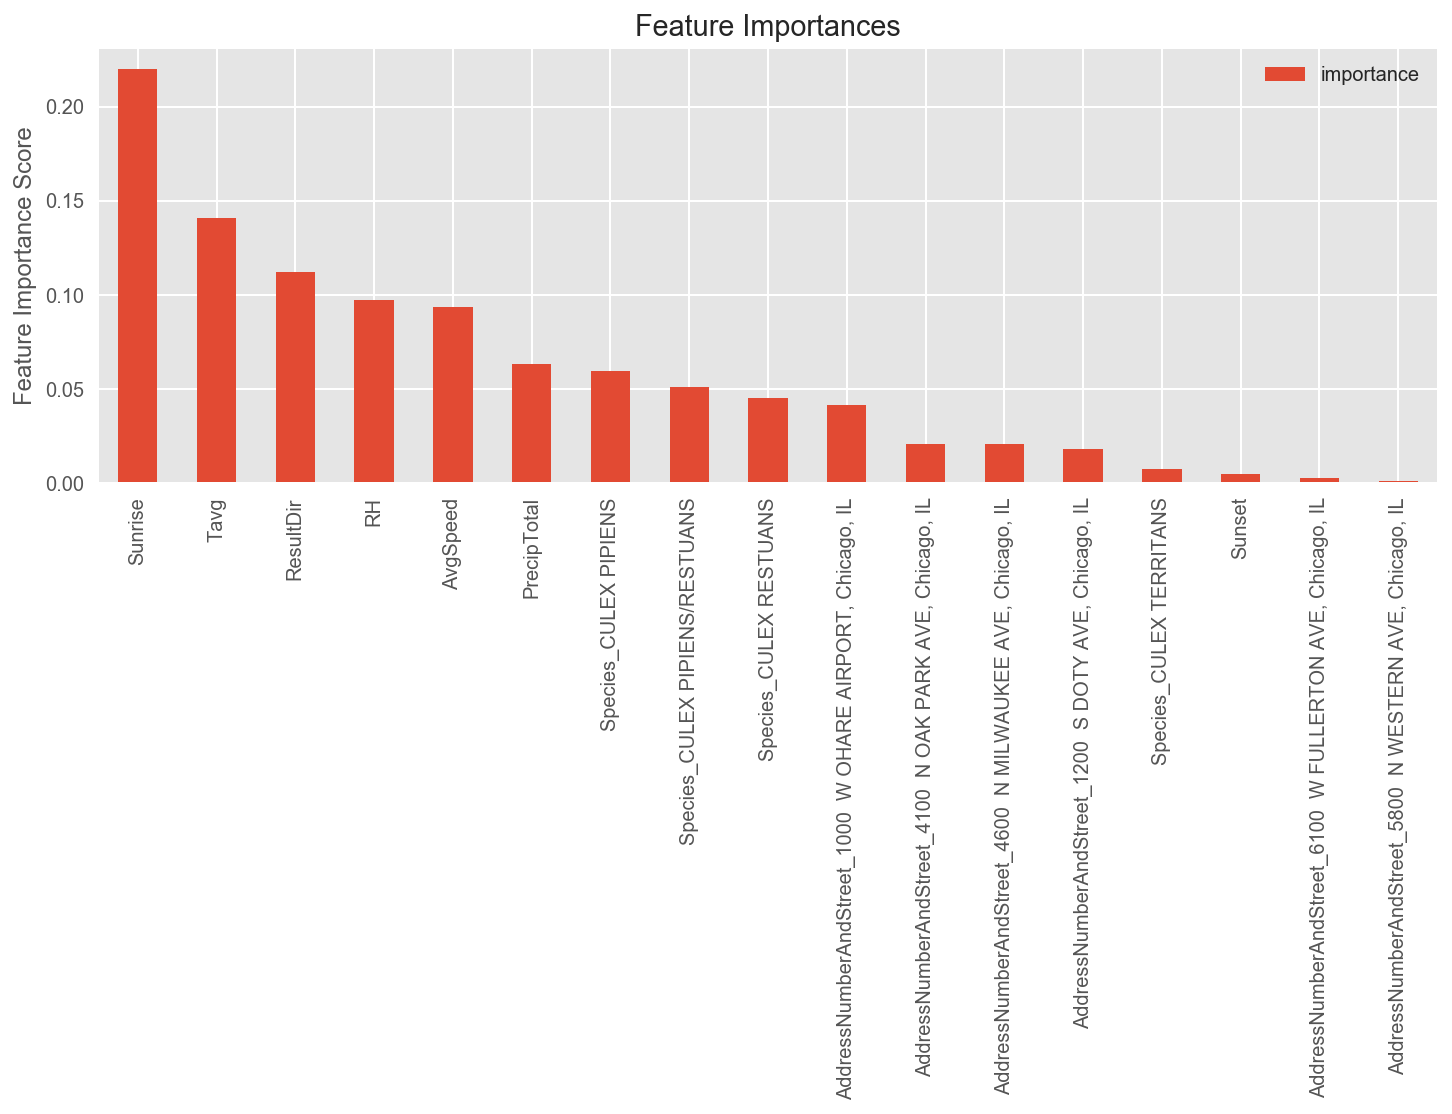

In [428]:
xgb = XGBClassifier()


grid = GridSearchCV(xgb, param_test1, cv=5)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param



Model Report
Accuracy : 0.9484
AUC Score (Train): 0.874158
'gamma': 0.0


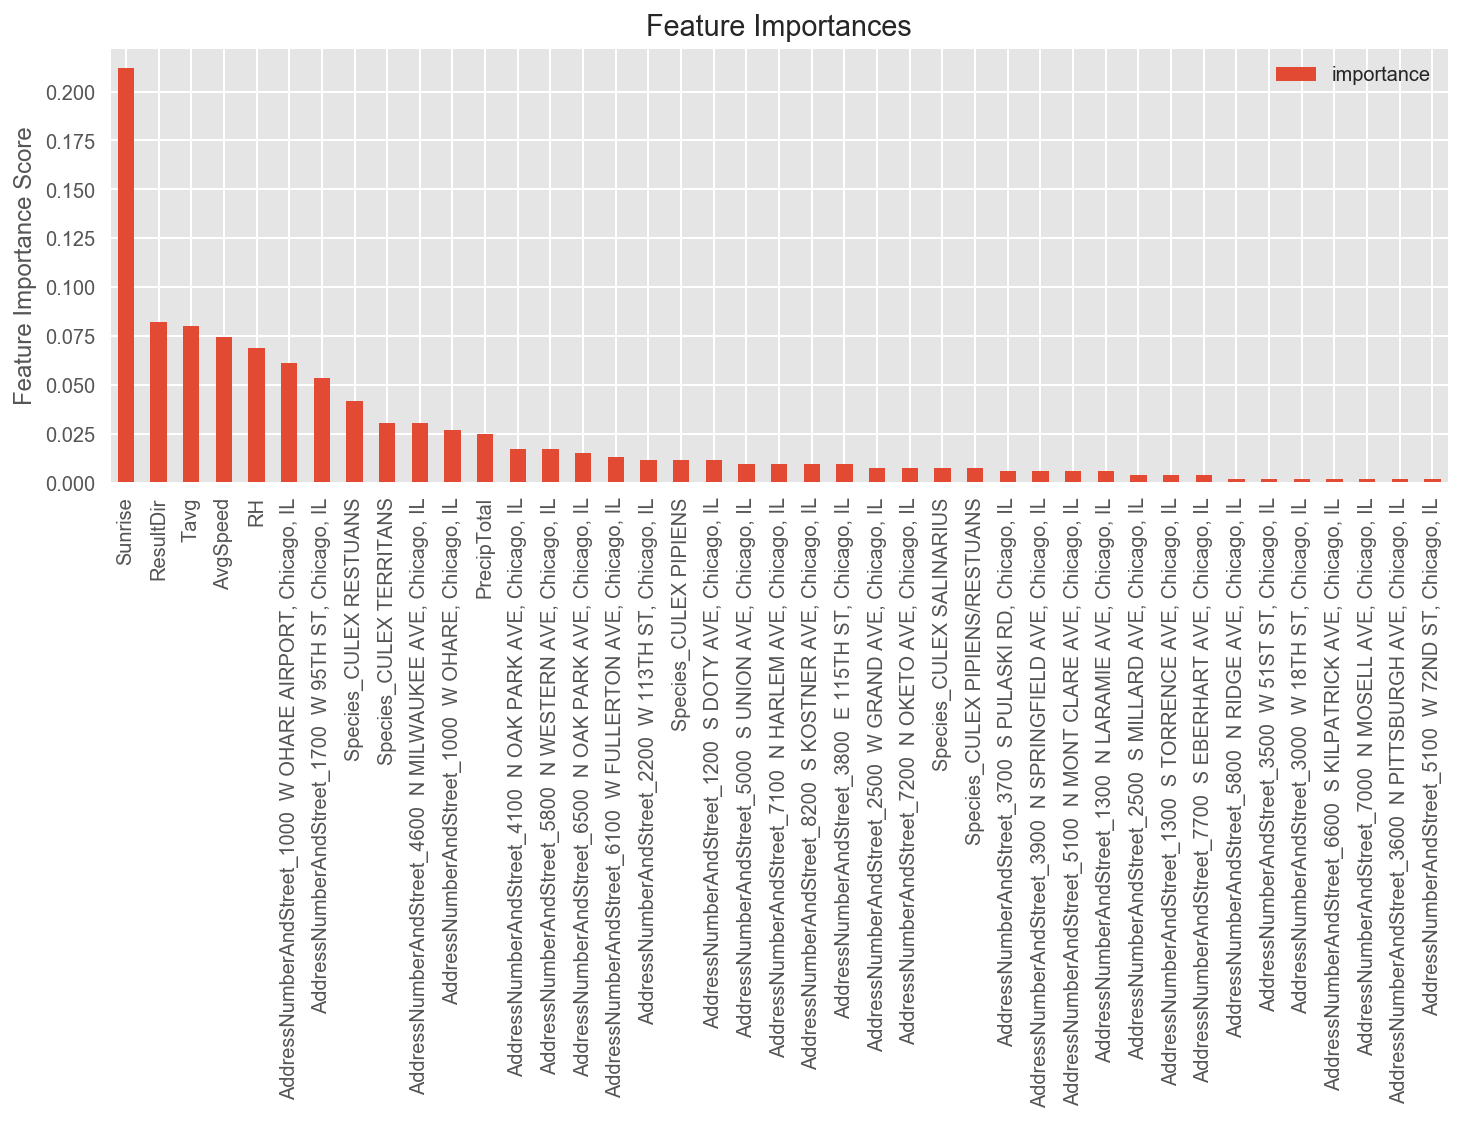

In [430]:
grid = GridSearchCV(xgb, param_test2, cv=5)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.9489
AUC Score (Train): 0.881865
'subsample': 0.8, 'colsample_bytree': 0.8


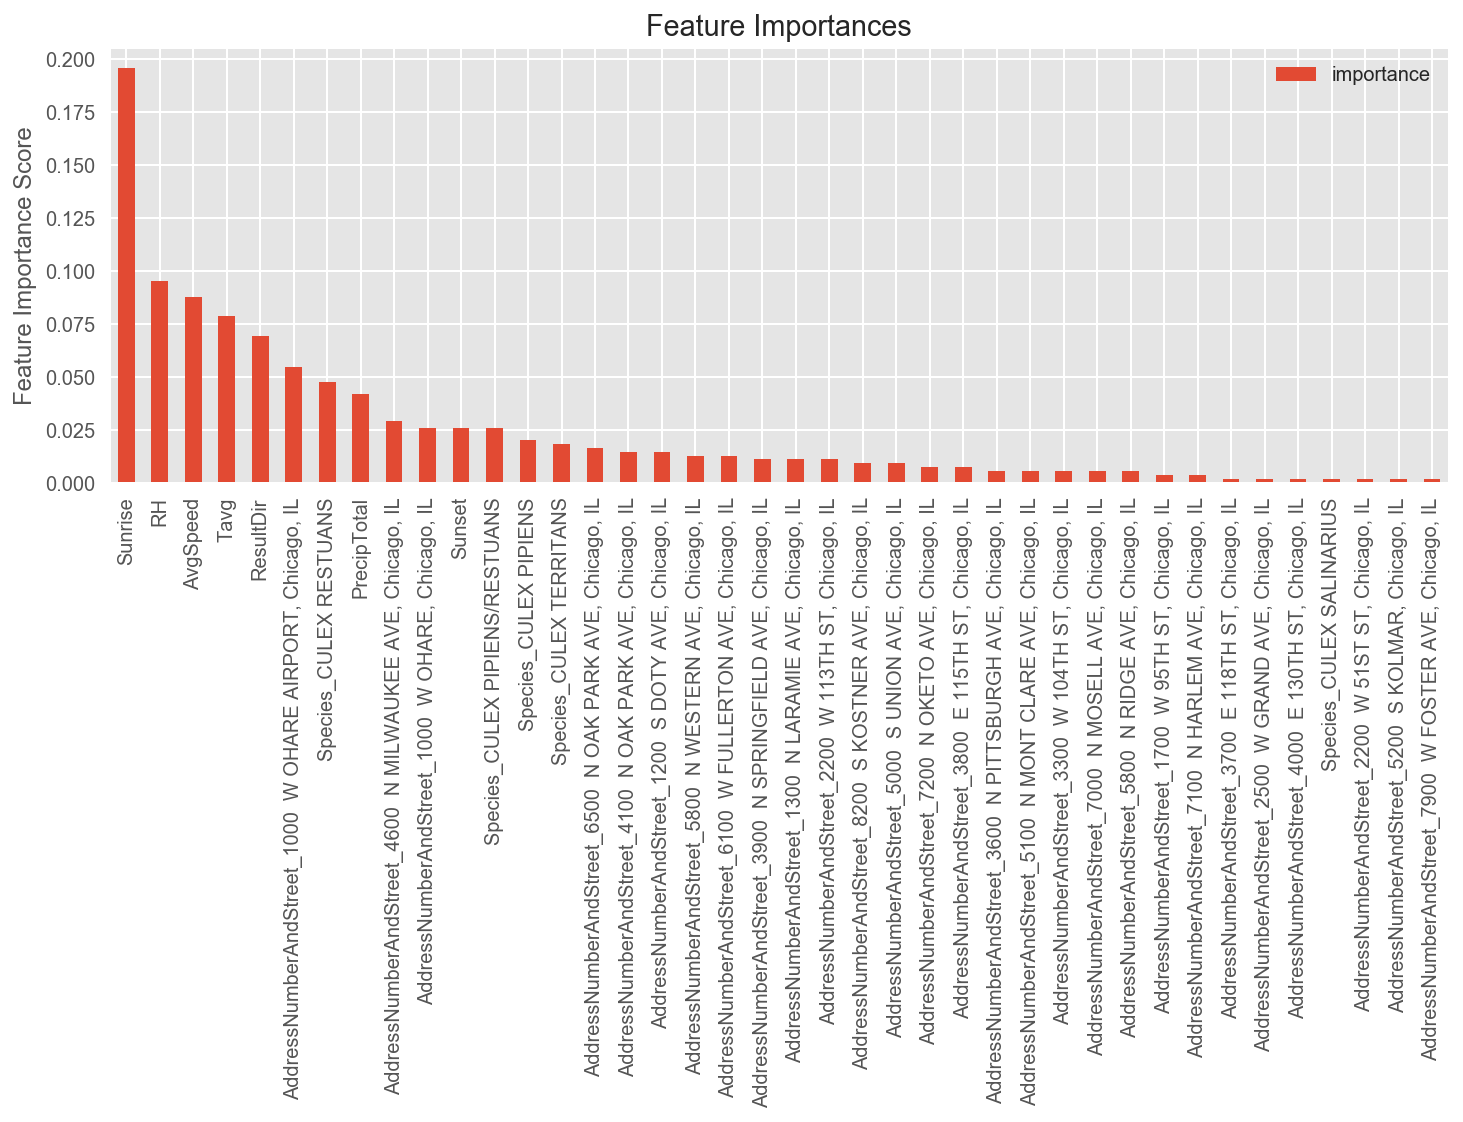

In [431]:
grid = GridSearchCV(xgb, param_test3, cv=5)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.9489
AUC Score (Train): 0.881637
'subsample': 0.8, 'colsample_bytree': 0.75


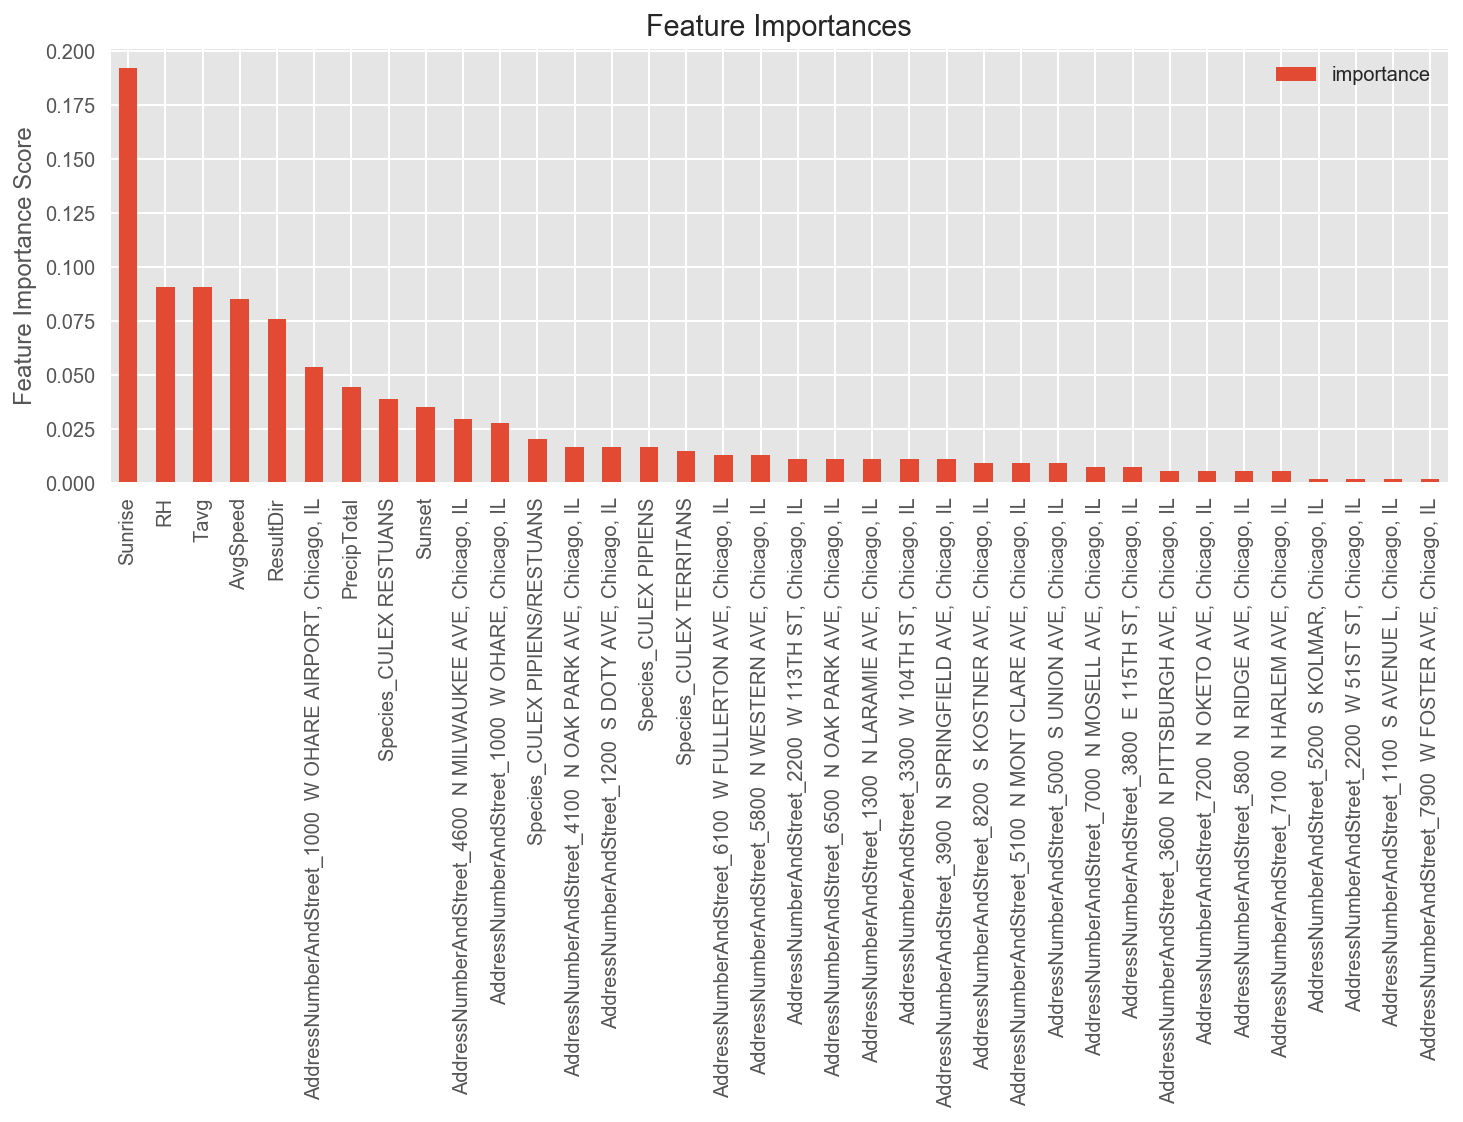

In [432]:
grid = GridSearchCV(xgb, param_test4, cv=5)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.9484
AUC Score (Train): 0.874158
'reg_alpha': 1e-05


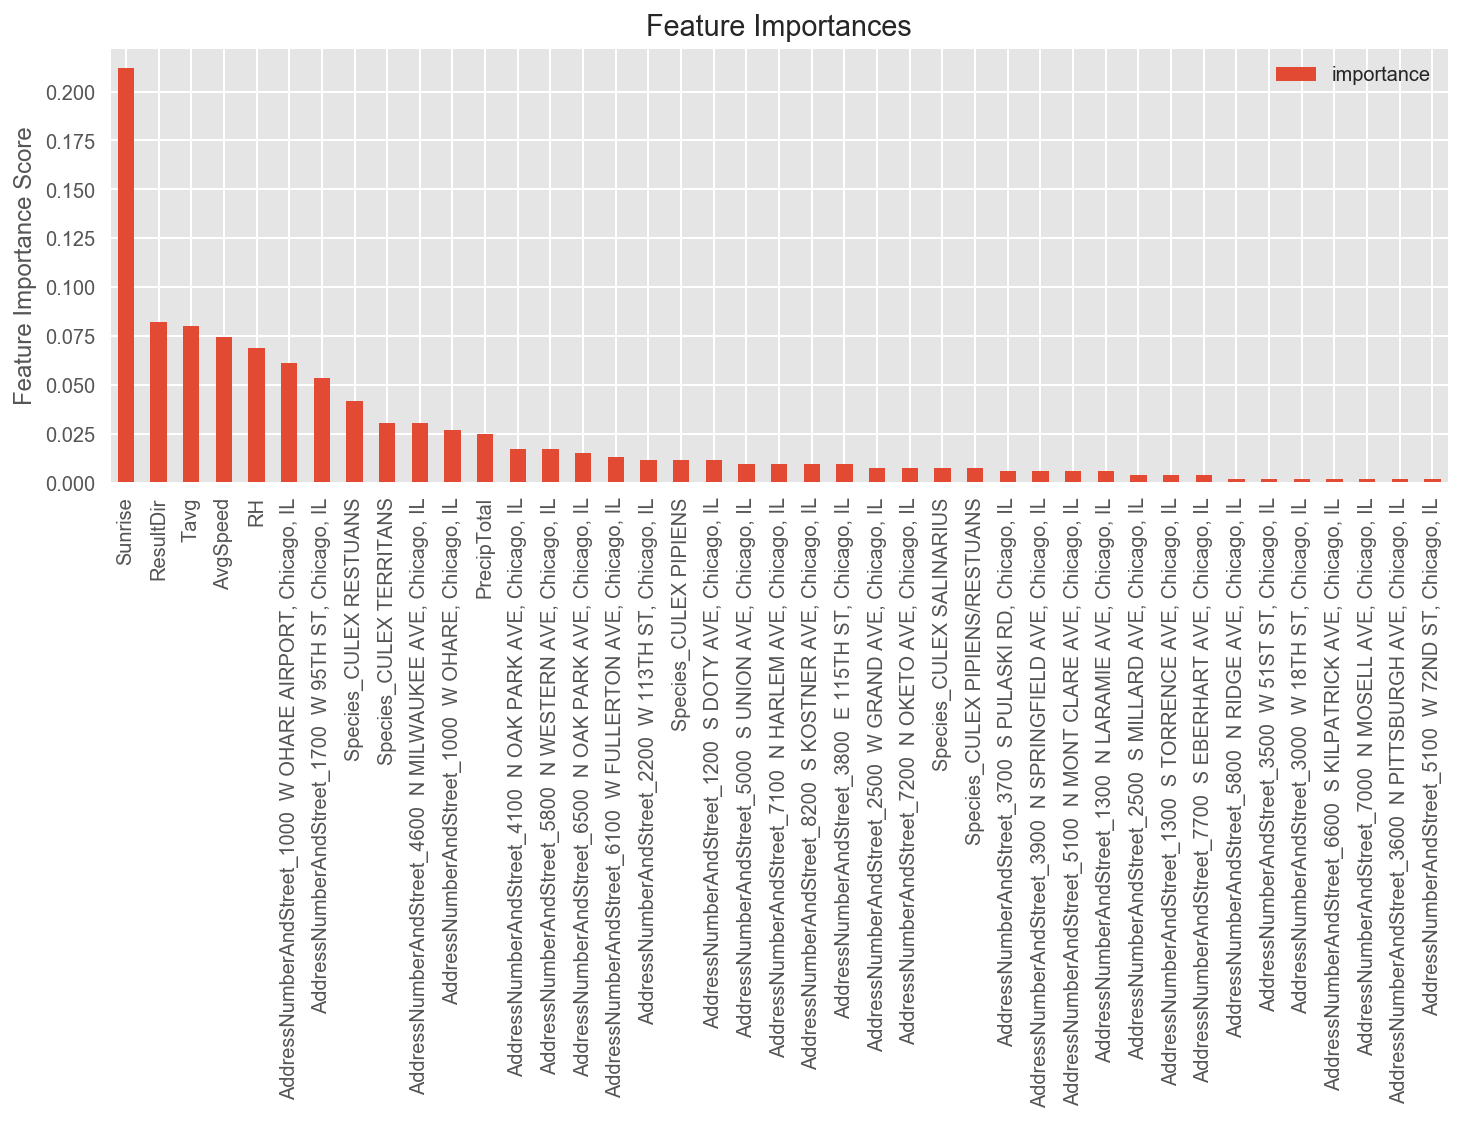

In [433]:
grid = GridSearchCV(xgb, param_test5, cv=5)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.9484
AUC Score (Train): 0.874158
'reg_alpha': 0


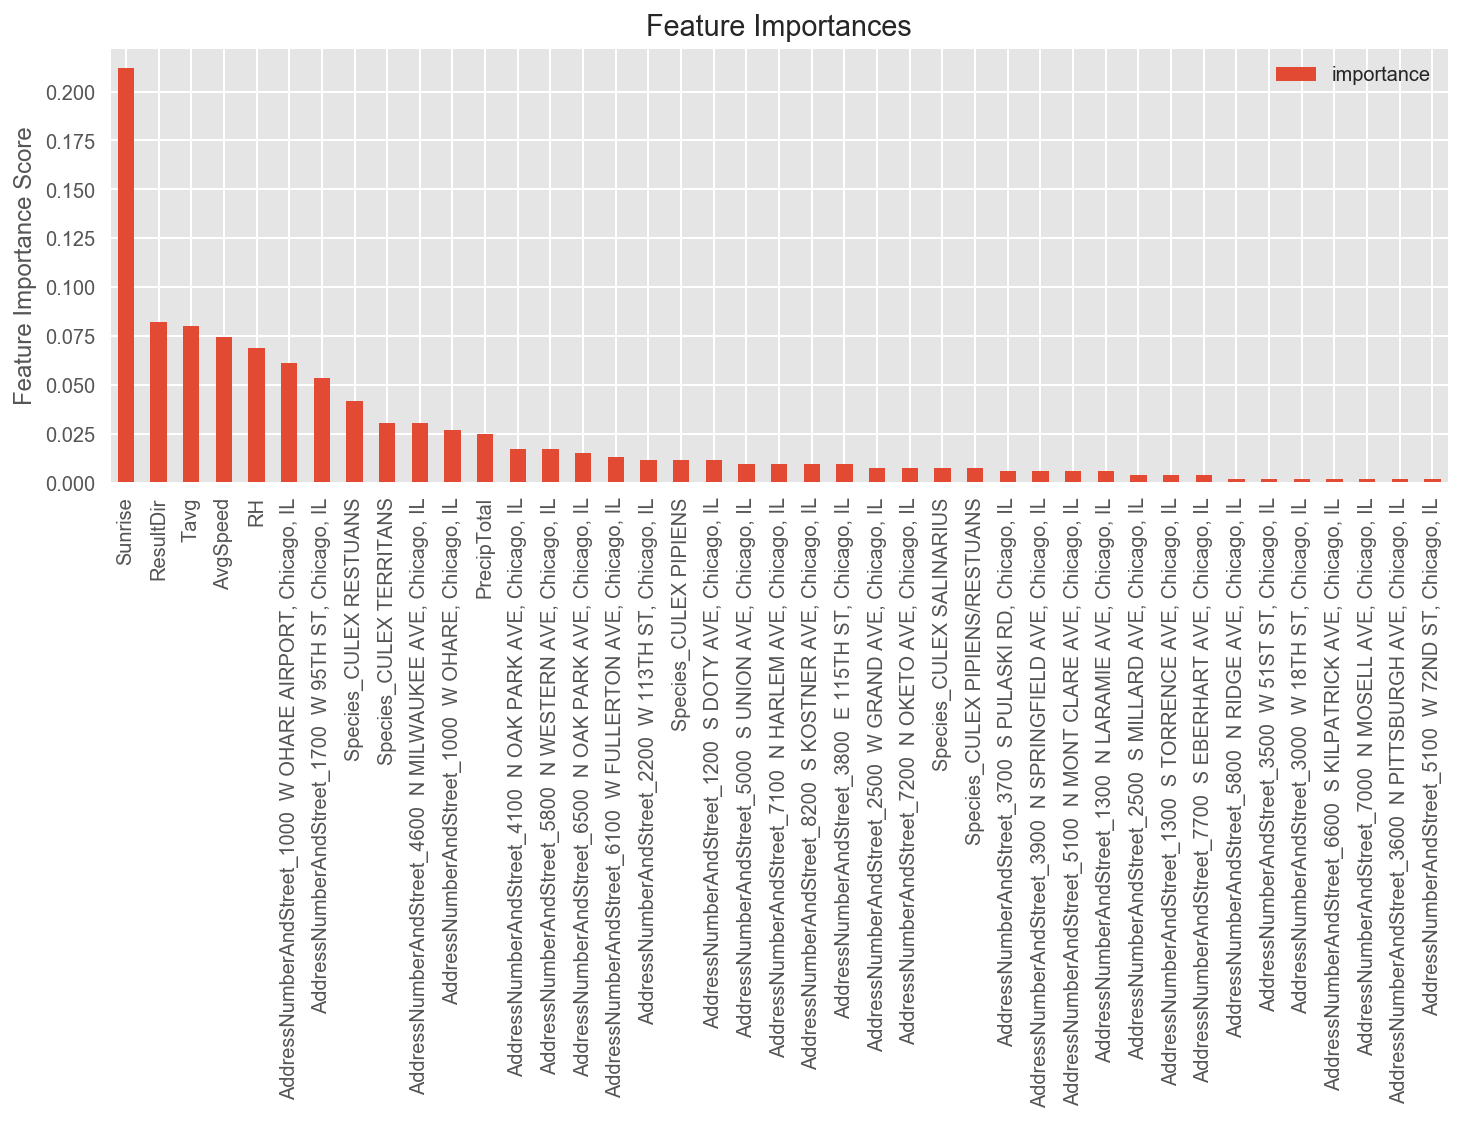

In [434]:
grid = GridSearchCV(xgb, param_test6, cv=5)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.9486
AUC Score (Train): 0.904163


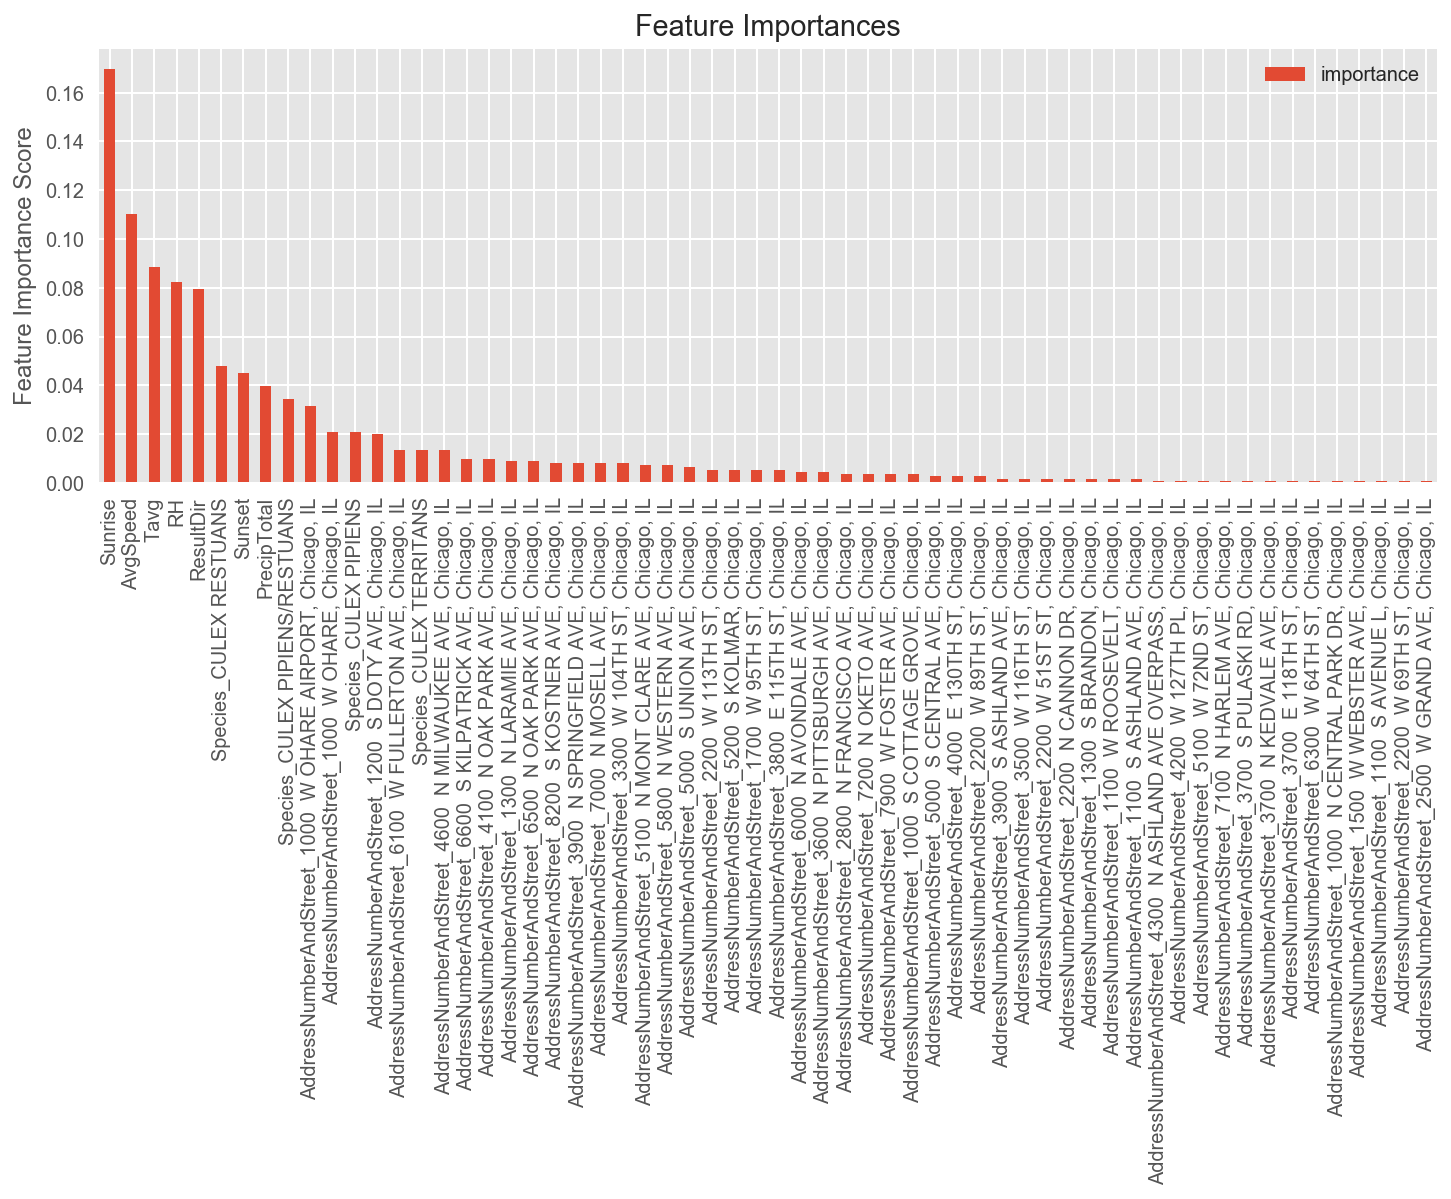

In [450]:
best_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.75, gamma=0.0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:tweedie', random_state=0,
       reg_alpha = 1e-05, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

best_xgb.fit(X_train, y_train)

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [64]:
grid.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [481]:
new_w_t = new_w_t.set_index(np.arange(len(new_w_t)))

In [482]:
# wnv = dumb[dumb['WnvPresent'] == 0]
# w1nv = dumb[dumb['WnvPresent'] == 1]

wnv = new_w_t[new_w_t['WnvPresent'] == 0]
w1nv = new_w_t[new_w_t['WnvPresent'] == 1]

In [483]:
wnv

WnvPresent  AddressNumberAndStreet_1000  N CENTRAL PARK DR, Chicago, IL  \
0              0                                                  0             
1              0                                                  0             
2              0                                                  0             
3              0                                                  0             
4              0                                                  0             
5              0                                                  0             
6              0                                                  0             
7              0                                                  0             
8              0                                                  0             
9              0                                                  0             
10             0                                                  0             
11             0                                                  0             
12             0                                                  0             
13             0                                                  0             
14             0                                                  0             
15             0                                                  0             
16             0                                                  0             
17             0                                                  0             
18             0                                                  0             
19             0                                                  0             
20             0                                                  0             
21             0                                                  0             
22             0                                                  0             
23             0                                                  0             
24             0                                                  0             
25             0                                                  0             
26             0                                                  0             
27             0                                                  0             
28             0                                                  0             
29             0                                                  0             
...          ...                                                ...             
8442           0                                                  0             
8444           0                                                  0             
8445           0                                                  0             
8446           0                                                  0             
8447           0                                                  0             
8448           0                                                  0             
8449           0                                                  0             
8450           0                                                  0             
8451           0                                                  0             
8453           0                                                  0             
8454           0                                                  0             
8455           0                                                  0             
8456           0                                                  0             
8457           0                                                  0             
8458           0                                                  0             
8459           0                                                  0             
8461           0                                                  0             
8462           0                     

In [484]:
print 'total', len(dumb)
print 'No wnv', len(wnv)
print 'wnv', len(w1nv)

total 10323
No wnv 8018
wnv 457


In [485]:
import random

print len(wnv.ix[random.sample(wnv.index, 457)])

print len(wnv)

457
8018


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [486]:
wnv = wnv.ix[random.sample(wnv.index, 457)]

In [487]:
balance = pd.concat([wnv, w1nv])

In [488]:
balance

WnvPresent  AddressNumberAndStreet_1000  N CENTRAL PARK DR, Chicago, IL  \
603            0                                                  0             
4011           0                                                  0             
249            0                                                  0             
5807           0                                                  0             
264            0                                                  0             
564            0                                                  0             
5162           0                                                  0             
4641           0                                                  0             
5828           0                                                  0             
959            0                                                  0             
2733           0                                                  0             
8330           0                                                  0             
2455           0                                                  0             
8410           0                                                  0             
1305           0                                                  0             
994            0                                                  0             
4381           0                                                  0             
5488           0                                                  0             
8119           0                                                  0             
1762           0                                                  0             
8436           0                                                  0             
2287           0                                                  0             
6928           0                                                  0             
82             0                                                  0             
2888           0                                                  0             
754            0                                                  0             
3428           0                                                  0             
7229           0                                                  0             
116            0                                                  0             
2896           0                                                  0             
...          ...                                                ...             
8184           1                                                  0             
8191           1                                                  0             
8194           1                                                  0             
8201           1                                                  0             
8212           1                                                  0             
8220           1                                                  0             
8227           1                                                  0             
8229           1                                                  0             
8231           1                                                  0             
8239           1                                                  0             
8243           1                                                  0             
8247           1                                                  0             
8248           1                                                  0             
8252           1                                                  0             
8260           1                                                  0             
8266           1                                                  0             
8275           1                                                  0             
8285           1                     

In [489]:
baseline = len(balance[balance['WnvPresent'] == 1]['WnvPresent']) / float(len(balance))
baseline

0.5

In [490]:
balance.to_csv('baseline_fifty.csv')

In [491]:
eda.eda(balance)

missing values 
WnvPresent                                                                 0
AddressNumberAndStreet_1000  N CENTRAL PARK DR, Chicago, IL                0
AddressNumberAndStreet_1000  S CALIFORNIA AVE, Chicago, IL                 0
AddressNumberAndStreet_1000  S COTTAGE GROVE, Chicago, IL                  0
AddressNumberAndStreet_1000  S STONY ISLAND AVE, Chicago, IL               0
AddressNumberAndStreet_1000  S VINCENNES, Chicago, IL                      0
AddressNumberAndStreet_1000  W 95TH ST, Chicago, IL                        0
AddressNumberAndStreet_1000  W OHARE AIRPORT, Chicago, IL                  0
AddressNumberAndStreet_1000  W OHARE, Chicago, IL                          0
AddressNumberAndStreet_1100  S ARTESIAN AVE, Chicago, IL                   0
AddressNumberAndStreet_1100  S ASHLAND AVE, Chicago, IL                    0
AddressNumberAndStreet_1100  S AVENUE L, Chicago, IL                       0
AddressNumberAndStreet_1100  S CALIFORNIA, Chicago, IL      

       WnvPresent  \
count  914.000000   
mean     0.500000   
std      0.500274   
min      0.000000   
25%      0.000000   
50%      0.500000   
75%      1.000000   
max      1.000000   

       AddressNumberAndStreet_1000  N CENTRAL PARK DR, Chicago, IL  \
count                                         914.000000             
mean                                            0.010941             
std                                             0.104082             
min                                             0.000000             
25%                                             0.000000             
50%                                             0.000000             
75%                                             0.000000             
max                                             1.000000             

       AddressNumberAndStreet_1000  S CALIFORNIA AVE, Chicago, IL  \
count                                         914.000000            
mean                                     

In [606]:
X = balance.drop('WnvPresent', 1)
y = balance.WnvPresent

In [607]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [494]:
param_test1 = {'subsample': [0.85], 'colsample_bytree': [0.8],
 'max_depth':range(3,10,1),
 'min_child_weight':range(1,12,1)
}

param_test2 = {'subsample': [0.85], 'colsample_bytree': [0.8],
 'gamma':[i/10.0 for i in range(0,5)]
}

param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

param_test4 = {   
 'subsample': [i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

param_test5 = {'subsample': [0.85], 'colsample_bytree': [0.8],
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

param_test6 = {'subsample': [0.85], 'colsample_bytree': [0.8],
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}



Model Report
Accuracy : 0.8307
AUC Score (Train): 0.904296
'subsample': 0.85, 'colsample_bytree': 0.8, 'max_depth': 3, 'min_child_weight': 1


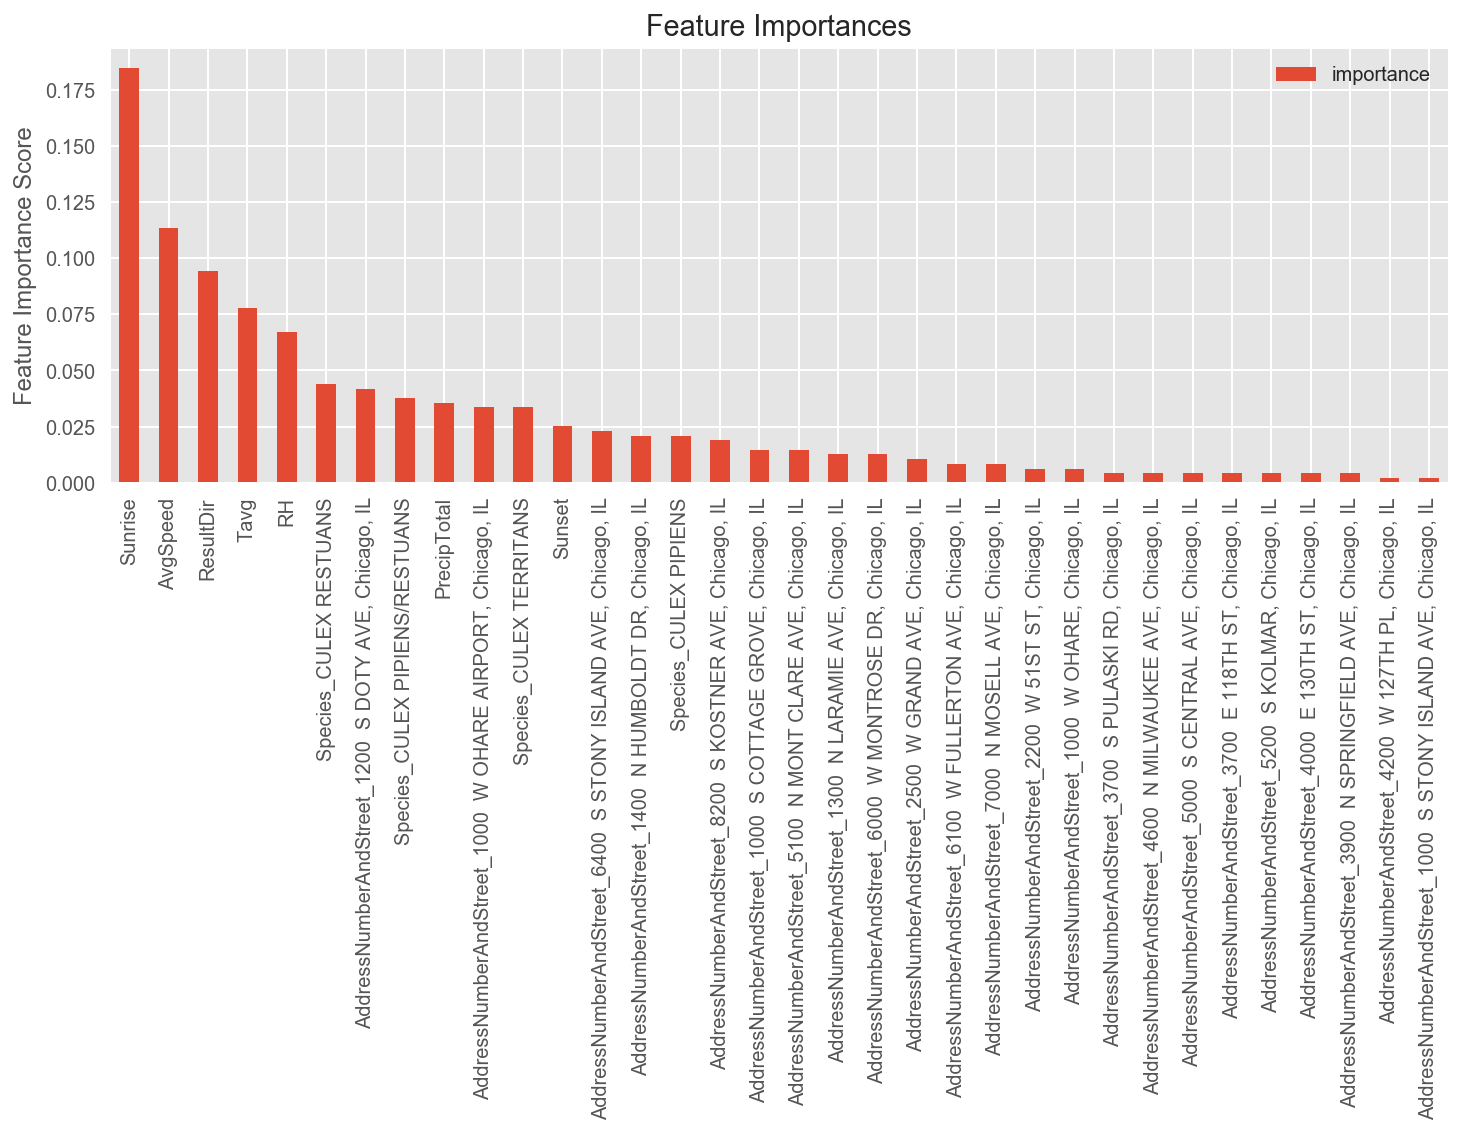

In [495]:
xgb = XGBClassifier()


grid = GridSearchCV(xgb, param_test1, cv=5)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param



Model Report
Accuracy : 0.8263
AUC Score (Train): 0.904048
'subsample': 0.85, 'colsample_bytree': 0.8, 'gamma': 0.3


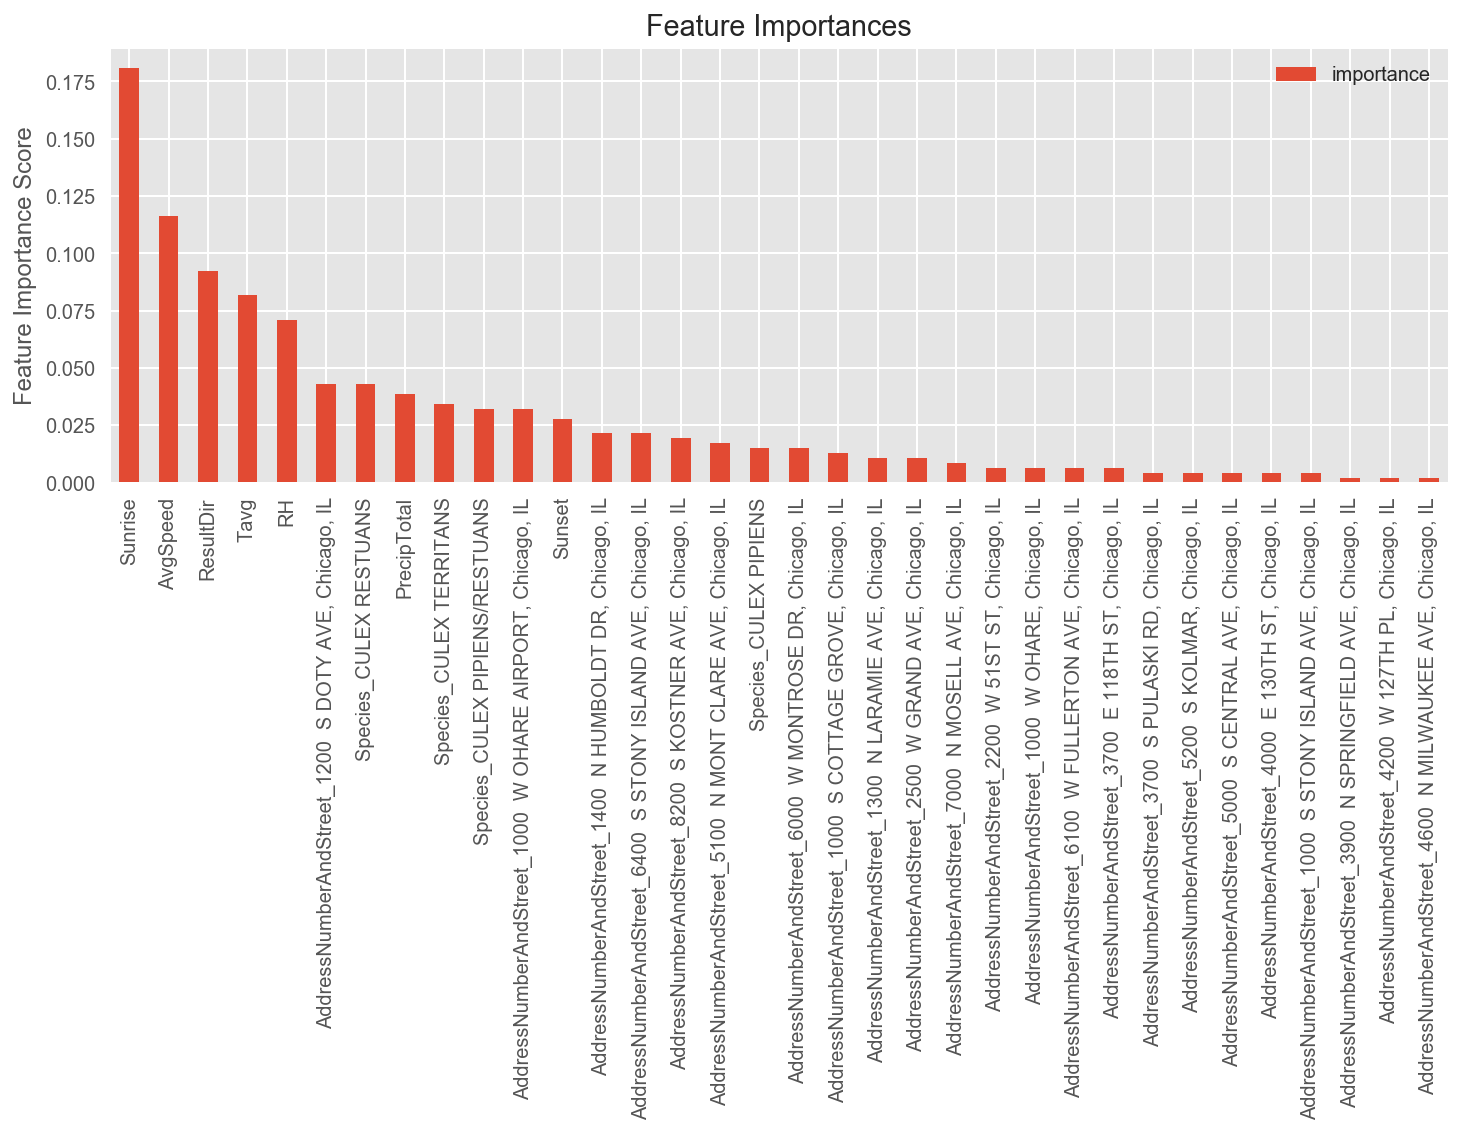

In [496]:
grid = GridSearchCV(xgb, param_test2, cv=5)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.8175
AUC Score (Train): 0.896730
'subsample': 0.8, 'colsample_bytree': 0.6


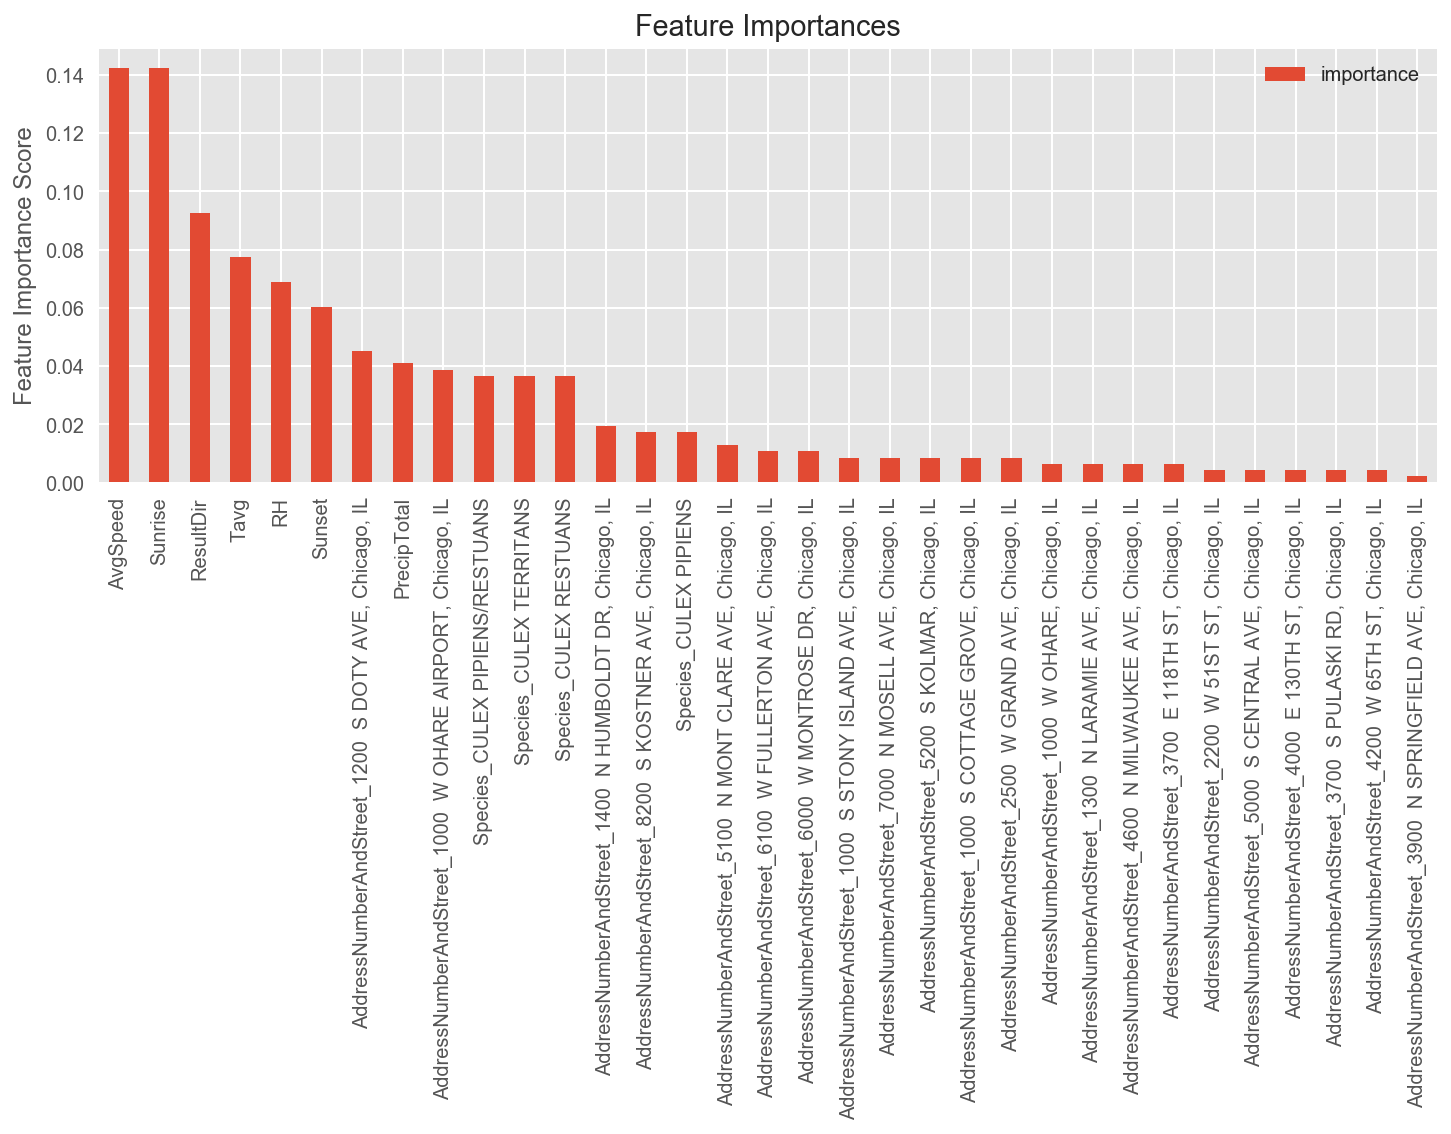

In [497]:
grid = GridSearchCV(xgb, param_test3, cv=5)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.8277
AUC Score (Train): 0.901644
'subsample': 0.85, 'colsample_bytree': 0.75


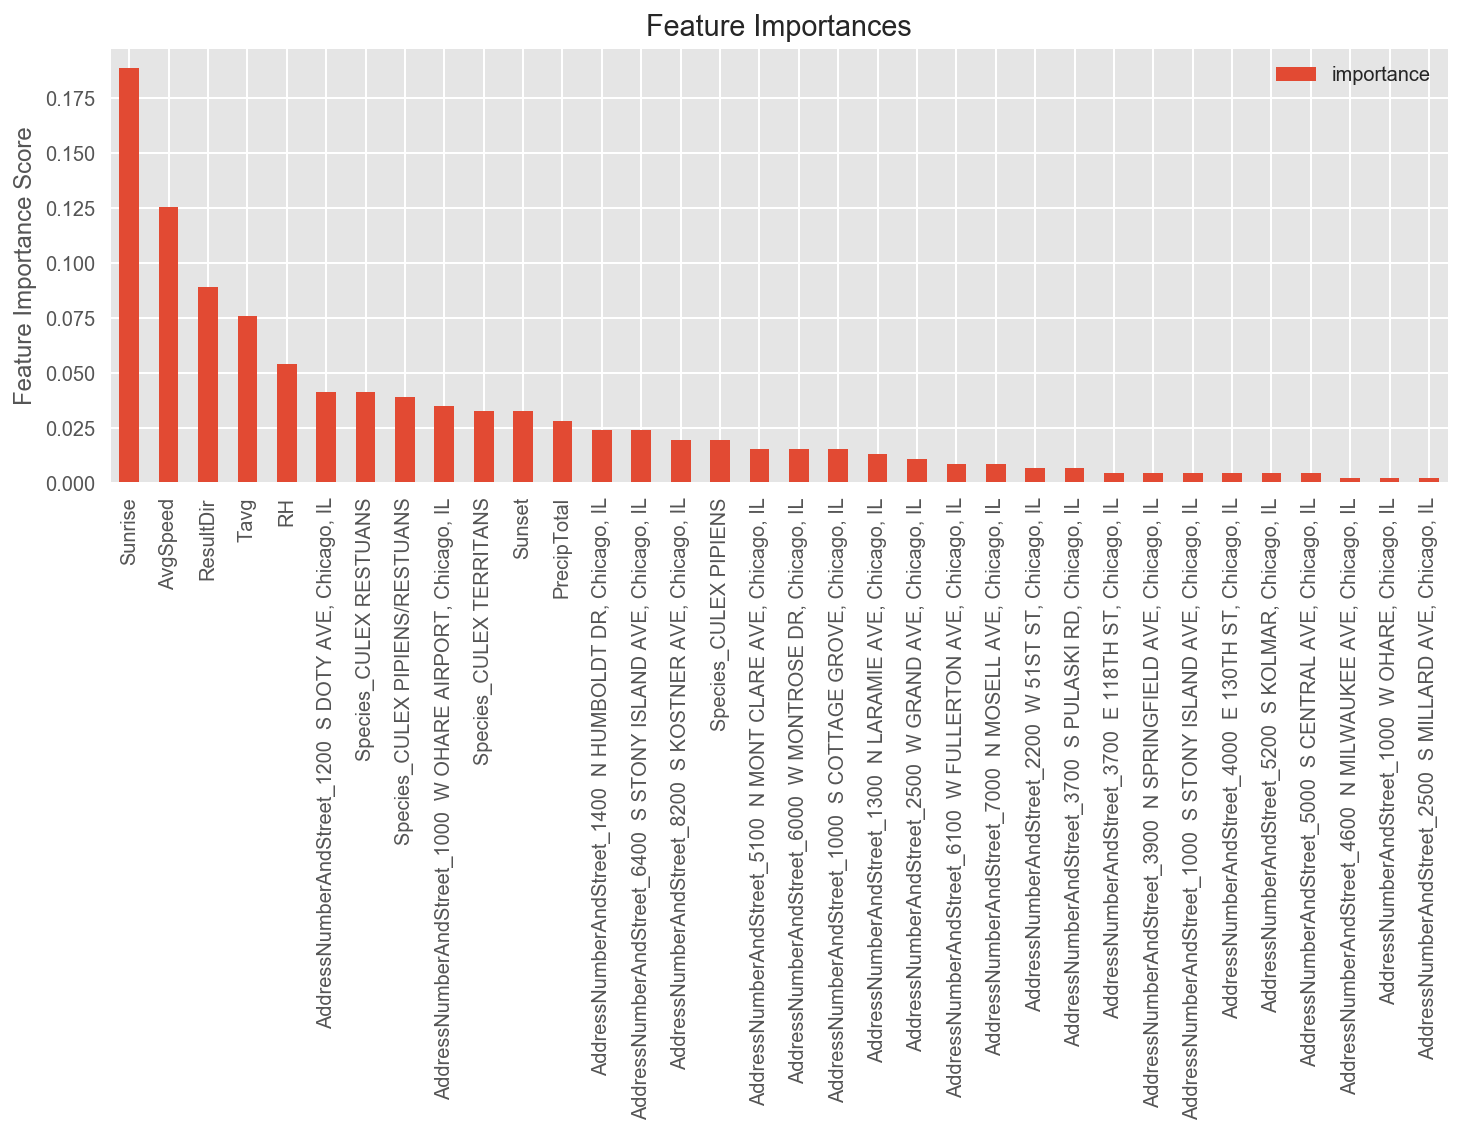

In [498]:
grid = GridSearchCV(xgb, param_test4, cv=5)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.8088
AUC Score (Train): 0.891658
'subsample': 0.85, 'reg_alpha': 1, 'colsample_bytree': 0.8


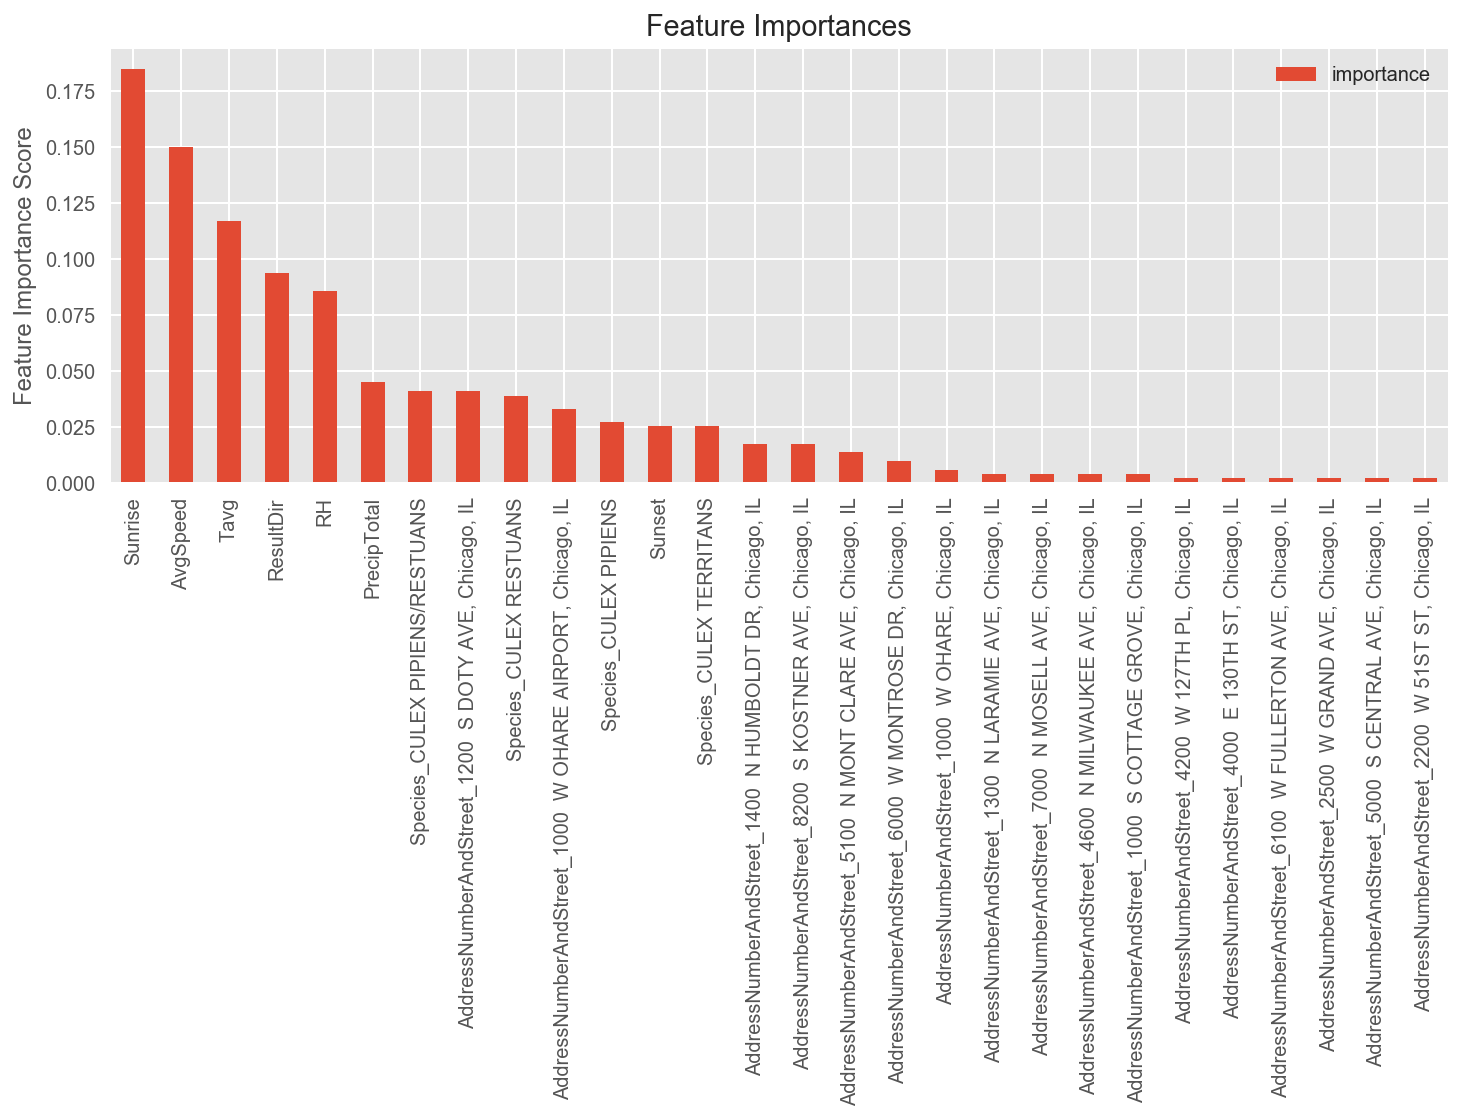

In [499]:
grid = GridSearchCV(xgb, param_test5, cv=5)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.8248
AUC Score (Train): 0.903055
'subsample': 0.85, 'reg_alpha': 0.05, 'colsample_bytree': 0.8


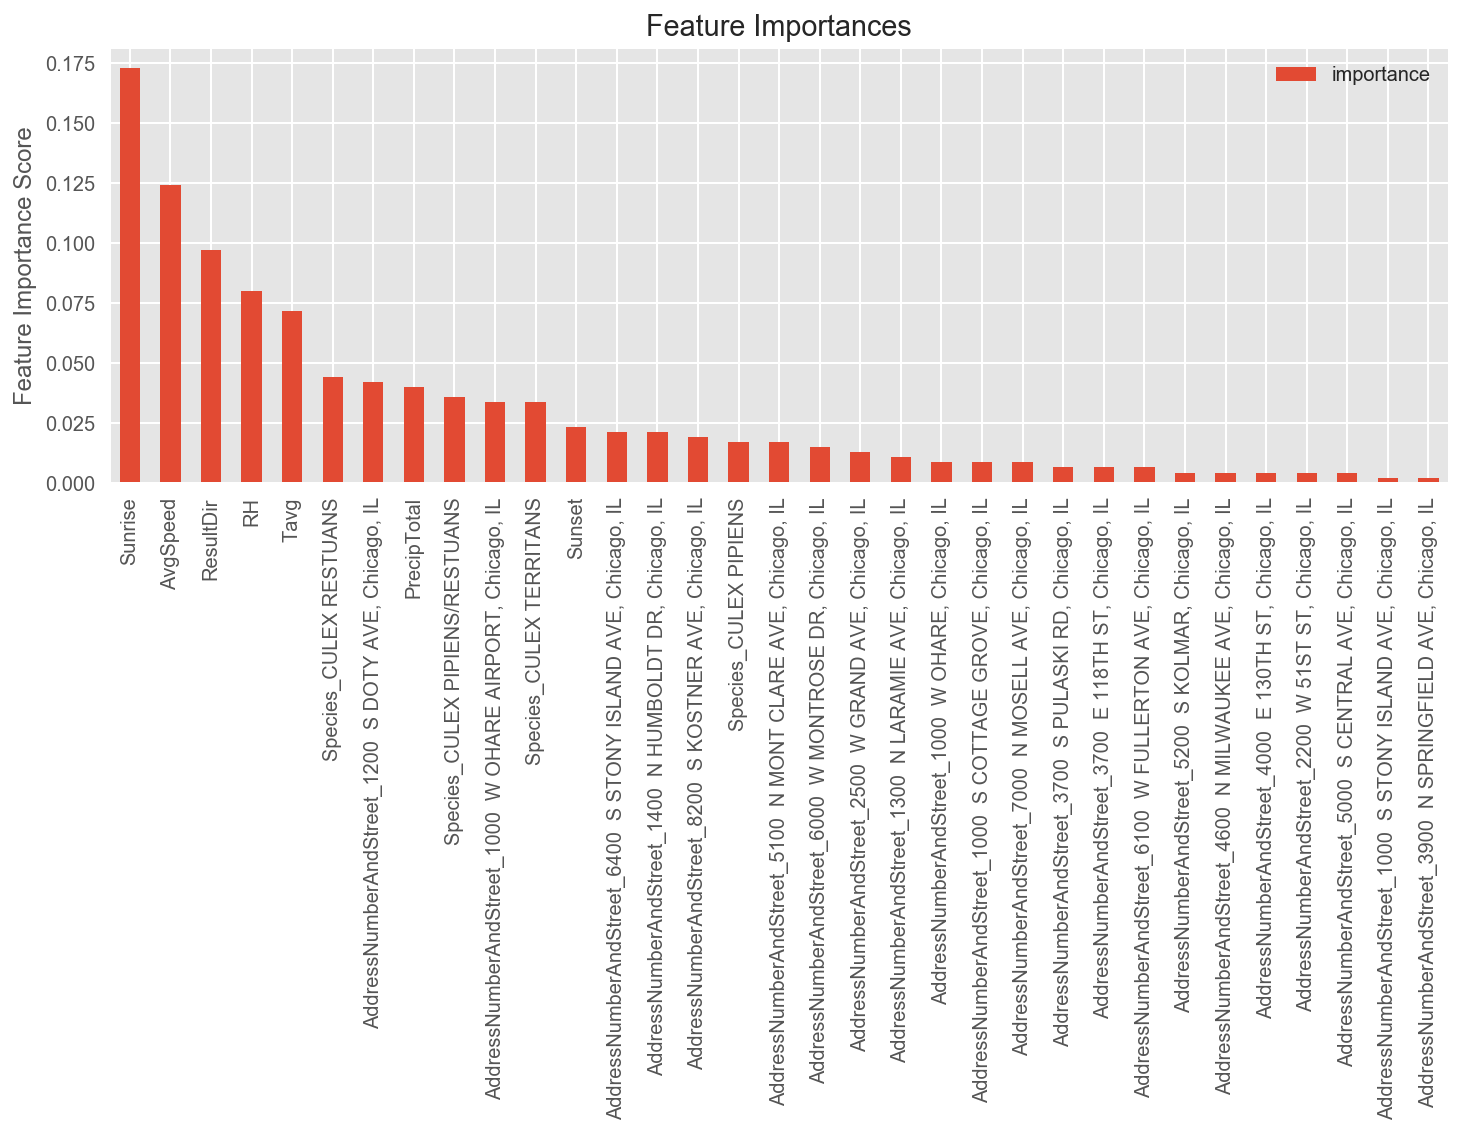

In [500]:
grid = GridSearchCV(xgb, param_test6, cv=5)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.8409
AUC Score (Train): 0.927856


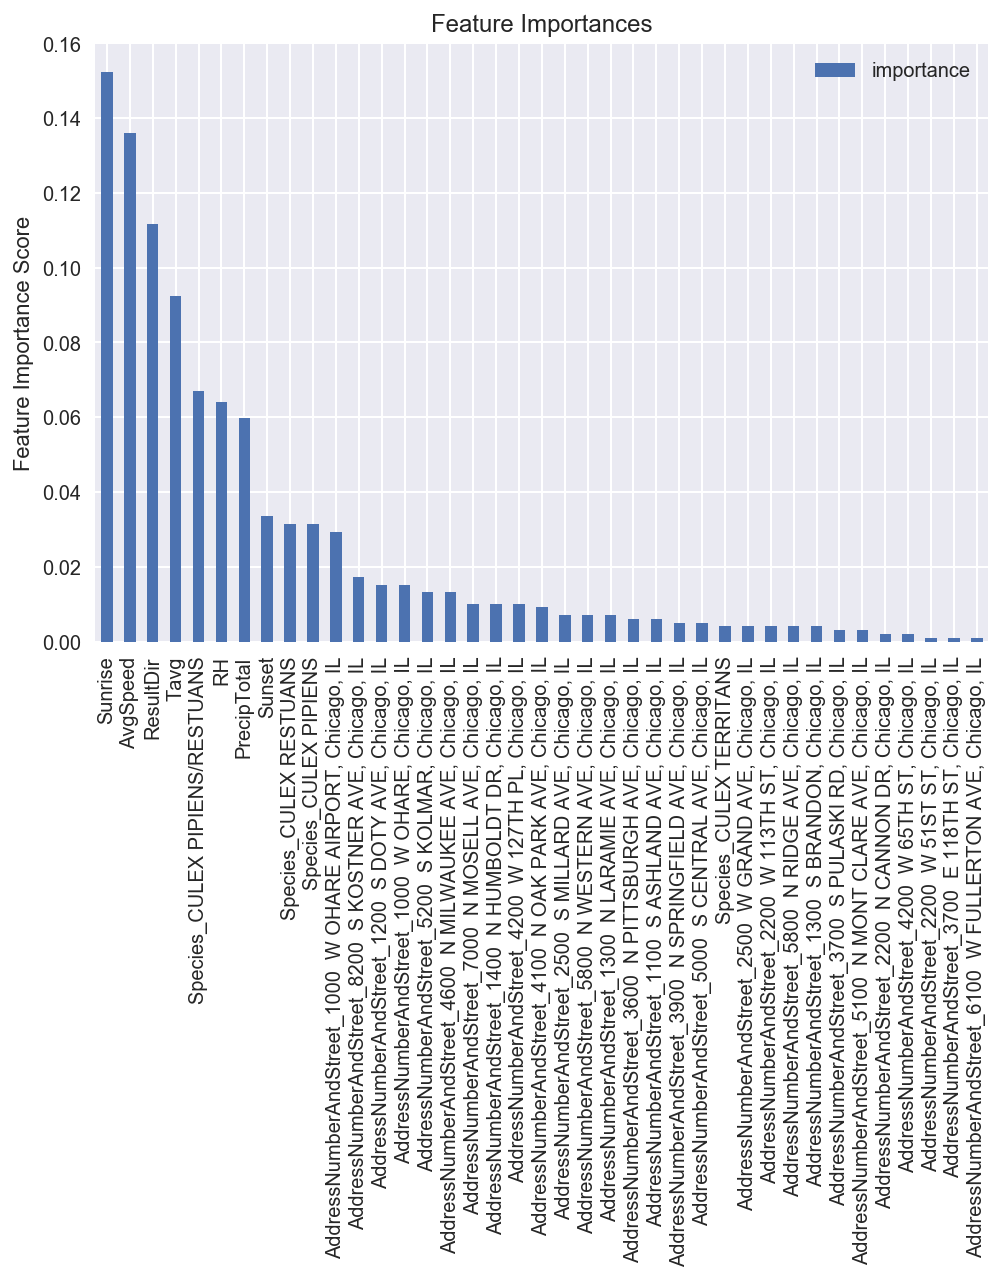

In [608]:
best_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.75, gamma=0.3, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:logistic', random_state=0,
       reg_alpha = 0.05, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.85)

best_xgb.fit(X_train, y_train)

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [509]:
feat_imp.index

Index([u'Sunrise', u'AvgSpeed', u'Tavg', u'ResultDir',
       u'Species_CULEX PIPIENS/RESTUANS', u'RH', u'PrecipTotal', u'Sunset',
       u'Species_CULEX RESTUANS',
       u'AddressNumberAndStreet_1000  W OHARE AIRPORT, Chicago, IL',
       u'AddressNumberAndStreet_1200  S DOTY AVE, Chicago, IL',
       u'Species_CULEX PIPIENS', u'Species_CULEX TERRITANS',
       u'AddressNumberAndStreet_1400  N HUMBOLDT DR, Chicago, IL',
       u'AddressNumberAndStreet_8200  S KOSTNER AVE, Chicago, IL',
       u'AddressNumberAndStreet_6400  S STONY ISLAND AVE, Chicago, IL',
       u'AddressNumberAndStreet_8100  E 91ST ST, Chicago, IL',
       u'AddressNumberAndStreet_5100  N MONT CLARE AVE, Chicago, IL',
       u'AddressNumberAndStreet_7000  N MOSELL AVE, Chicago, IL',
       u'AddressNumberAndStreet_1000  S COTTAGE GROVE, Chicago, IL',
       u'AddressNumberAndStreet_2200  W 51ST ST, Chicago, IL',
       u'AddressNumberAndStreet_4600  N MILWAUKEE AVE, Chicago, IL',
       u'AddressNumberAndStreet_100

In [510]:
len(feat_imp)

42

In [511]:
important_balance = pd.DataFrame(balance, columns=feat_imp.index)

In [512]:
important_balance['WnvPresent'] = balance.WnvPresent

In [513]:
X = important_balance.drop('WnvPresent', 1)
y = important_balance.WnvPresent

In [515]:
# from sklearn.linear_model import LogisticRegression

# penalties = ['l1', 'l2']
# range_C = [10 ** i for i in range(-3, 3)]
# class_weights = [None, 'balanced']

# params_grid = dict(penalty=penalties, 
#               C=range_C, 
#               class_weight=class_weights)

# logit = LogisticRegression()

# grid = GridSearchCV(xgb, param_grid)
# grid.fit(X_train, y_train)


# best_logit = grid.best_estimator_

# best_logit = best_logit.fit(X_train, y_train)
# score = best_logit.score(X_test, y_test)
# print "{} Score:\t{:0.3}".format('Logitistic Classifier', score.mean().round(3))

In [514]:
# logit_importance = pd.DataFrame(best_logit.feature_importances_,
#                                    index = X.columns,
#                                     columns=['importance']).sort_values('importance',
#                                                                         ascending=False)
# logit_importance

In [516]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn import svm, linear_model, datasets
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

def svm_cm(X, y, kernel): 
    classifier = svm.SVC(kernel=kernel)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    
    print kernel + ' SVM Classifier: ', cross_val_score(classifier, X_train, y_train, cv=3, scoring='accuracy').mean()
    cnf_matrix = confusion_matrix(y_test, y_pred)
    
    print cnf_matrix
    #Not normalized dconfusion matrix
    #Y axis actual, x axis predicted
    print 'Accuracy: ', accuracy_score(y_test, y_pred, normalize=True)
    print 'Precision: ', precision_score(y_test, y_pred, average='macro')
    print 
    print (classification_report(y_test, y_pred))
    return classifier

In [547]:
svm_lin = svm_cm(X, y, 'linear')

linear SVM Classifier:  0.709511223474
[[66 40]
 [27 96]]
Accuracy:  0.707423580786
Precision:  0.707779886148

             precision    recall  f1-score   support

          0       0.71      0.62      0.66       106
          1       0.71      0.78      0.74       123

avg / total       0.71      0.71      0.71       229



In [552]:
svm_rbf = svm_cm(X, y, 'rbf')

rbf SVM Classifier:  0.731412192448
[[83 39]
 [22 85]]
Accuracy:  0.733624454148
Precision:  0.737980030722

             precision    recall  f1-score   support

          0       0.79      0.68      0.73       122
          1       0.69      0.79      0.74       107

avg / total       0.74      0.73      0.73       229



In [561]:
svm_rbf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [562]:
svm_lin

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [540]:
# best_svm = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
#   max_iter=-1, probability=False, random_state=None, shrinking=True,
#   tol=0.001, verbose=False)

In [541]:
# svm = svm.fit(X_train, y_train)
# score = best_svm.score(X_test, y_test)
# print "{} Score:\t{:0.3}".format('SVM Classifier', score.mean().round(3))

In [542]:
# classifier = svm.SVC(kernel='rbf')
# X_train, X_test, y_train, y_test = train_test_split(X, y)
# y_pred = clf.fit(X_train, y_train).predict(X_test)

# print 'rbf' + ' SVM Classifier: ', cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy').mean()
# cnf_matrix = confusion_matrix(y_test, y_pred)

# print cnf_matrix
# #Not normalized dconfusion matrix
# #Y axis actual, x axis predicted
# print 'Accuracy: ', accuracy_score(y_test, y_pred, normalize=True)
# print 'Precision: ', precision_score(y_test, y_pred, average='macro')
# print 
# print (classification_report(y_test, y_pred))


In [603]:
best_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.75, gamma=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:logistic',
       random_state=0, reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.85)

In [573]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.75, gamma=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:logistic',
       random_state=0, reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.85)

In [574]:
class_names = ['No WNV', 'WNV']
y_pred = classifier.fit(X_train, y_train).predict(X_test)

Automatically created module for IPython interactive environment
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.75, gamma=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:logistic',
       random_state=0, reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.85)  SVM Classifier:  0.743121148581 


Accuracy:  0.737991266376
Precision:  0.741530691531
Confusion matrix, without normalization
[[76 37]
 [23 93]]
Normalized confusion matrix
[[ 0.67  0.33]
 [ 0.2   0.8 ]]


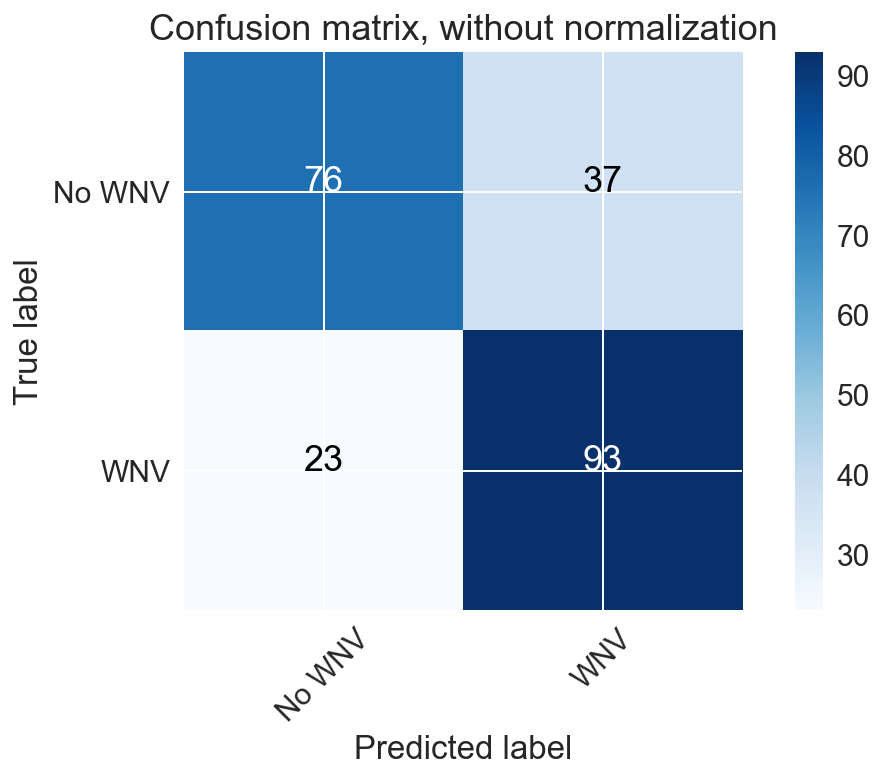

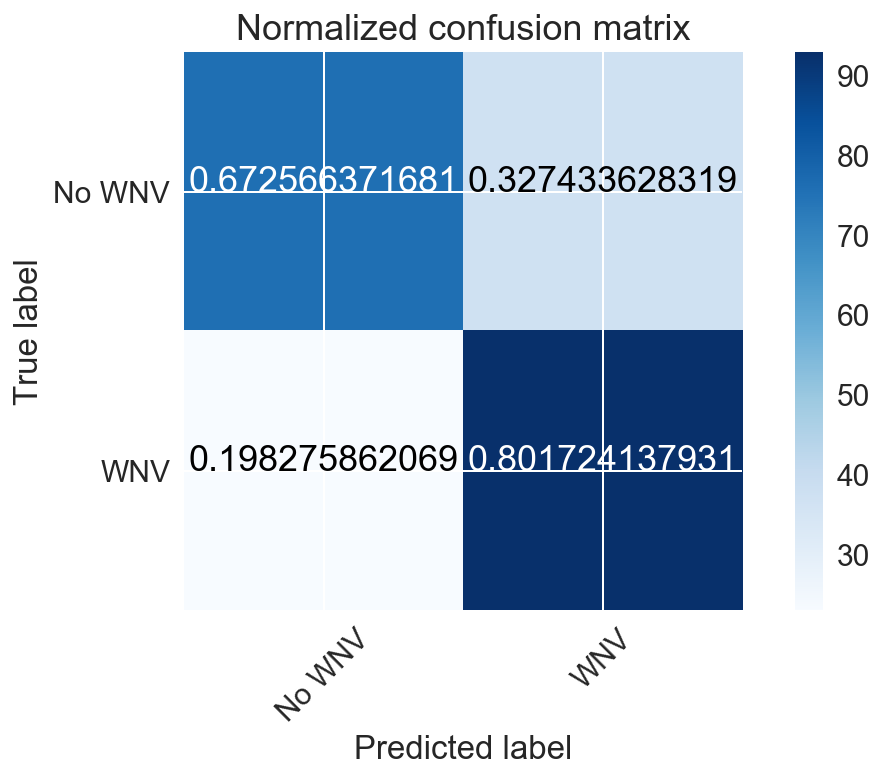

In [575]:
import itertools
print(__doc__)

sns.set(font_scale=1.5)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
 

    thresh = cm.max() / 1.5
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Print classifier score
print classifier, ' SVM Classifier: ', cross_val_score(classifier, X_train, y_train, cv=3, scoring='accuracy').mean(), '\n', '\n'

# Print Accuracy and Precision
print 'Accuracy: ', accuracy_score(y_test, y_pred, normalize=True)
print 'Precision: ', precision_score(y_test, y_pred, average='macro')

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [138]:
X = balance.drop('WnvPresent', 1)
y = balance.WnvPresent

In [194]:
svm_lin = svm_cm(X, y, 'linear')


linear SVM Classifier:  0.734879227053
[[100  40]
 [ 35 101]]
Accuracy:  0.728260869565
Precision:  0.728526398739

             precision    recall  f1-score   support

          0       0.74      0.71      0.73       140
          1       0.72      0.74      0.73       136

avg / total       0.73      0.73      0.73       276



In [140]:
svm_rbf = svm_cm(X, y, 'rbf')

rbf SVM Classifier:  0.697351778656
[[101  36]
 [ 37 102]]
Accuracy:  0.735507246377
Precision:  0.735507246377

             precision    recall  f1-score   support

          0       0.73      0.74      0.73       137
          1       0.74      0.73      0.74       139

avg / total       0.74      0.74      0.74       276



In [173]:
svm_rbf.coef0

0.0

In [576]:
important_words2 = pd.DataFrame(svm_lin.coef_)
coef = np.array(important_words2[0:])

coef = coef.transpose()
from matplotlib import pyplot

In [577]:
important_words2 = pd.DataFrame(coef,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
important_words2

importance
Sunrise                                               5.033164
Sunset                                                3.123297
AddressNumberAndStreet_8200  S KOSTNER AVE, Chi...    1.915777
Species_CULEX PIPIENS                                 1.459865
Species_CULEX PIPIENS/RESTUANS                        1.240129
AddressNumberAndStreet_6100  W FULLERTON AVE, C...    1.135679
AddressNumberAndStreet_1300  N LARAMIE AVE, Chi...    1.135678
AddressNumberAndStreet_4200  W 65TH ST, Chicago...    1.000000
AddressNumberAndStreet_5100  N MONT CLARE AVE, ...    0.858953
AddressNumberAndStreet_1000  W OHARE, Chicago, IL     0.759635
AddressNumberAndStreet_1000  W OHARE AIRPORT, C...    0.716775
AddressNumberAndStreet_1200  S DOTY AVE, Chicag...    0.651150
AddressNumberAndStreet_3900  N SPRINGFIELD AVE,...    0.629779
AddressNumberAndStreet_2200  W 113TH ST, Chicag...    0.596412
AddressNumberAndStreet_4600  N MILWAUKEE AVE, C...    0.564322
AddressNumberAndStreet_4100  N OAK PARK AVE, Ch...    0.431529
AddressNumberAndStreet_1100  S ASHLAND AVE, Chi...    0.431419
AddressNumberAndStreet_5800  N WESTERN AVE, Chi...    0.431406
AddressNumberAndStreet_5200  S KOLMAR, Chicago, IL    0.258887
AddressNumberAndStreet_1000  S STONY ISLAND AVE...    0.248940
AddressNumberAndStreet_3600  N PITTSBURGH AVE, ...    0.219674
AddressNumberAndStreet_4200  W 127TH PL, Chicag...    0.188331
AddressNumberAndStreet_7000  N MOSELL AVE, Chic...    0.178590
Tavg                                                  0.062611
Species_CULEX RESTUANS                                0.041120
RH                                                    0.012975
AddressNumberAndStreet_4000  E 130TH ST, Chicag...    0.000000
AvgSpeed                                             -0.000847
ResultDir                                            -0.002886
AddressNumberAndStreet_5000  S CENTRAL AVE, Chi...   -0.041364
AddressNumberAndStreet_1000  S COTTAGE GROVE, C...   -0.204622
PrecipTotal                                          -0.229878
AddressNumberAndStreet_2500  S MILLARD AVE, Chi...   -0.409418
AddressNumberAndStreet_2200  W 51ST ST, Chicago...   -0.715125
Species_CULEX TERRITANS                              -0.741113
AddressNumberAndStreet_1400  N HUMBOLDT DR, Chi...   -0.849729
AddressNumberAndStreet_3700  S PULASKI RD, Chic...   -0.849731
AddressNumberAndStreet_2500  W GRAND AVE, Chica...   -1.187764
AddressNumberAndStreet_8100  E 91ST ST, Chicago...   -1.219600
AddressNumberAndStreet_6400  S STONY ISLAND AVE...   -1.623331
AddressNumberAndStreet_6000  W MONTROSE DR, Chi...   -1.682809
AddressNumberAndStreet_3700  E 118TH ST, Chicag...   -1.697324

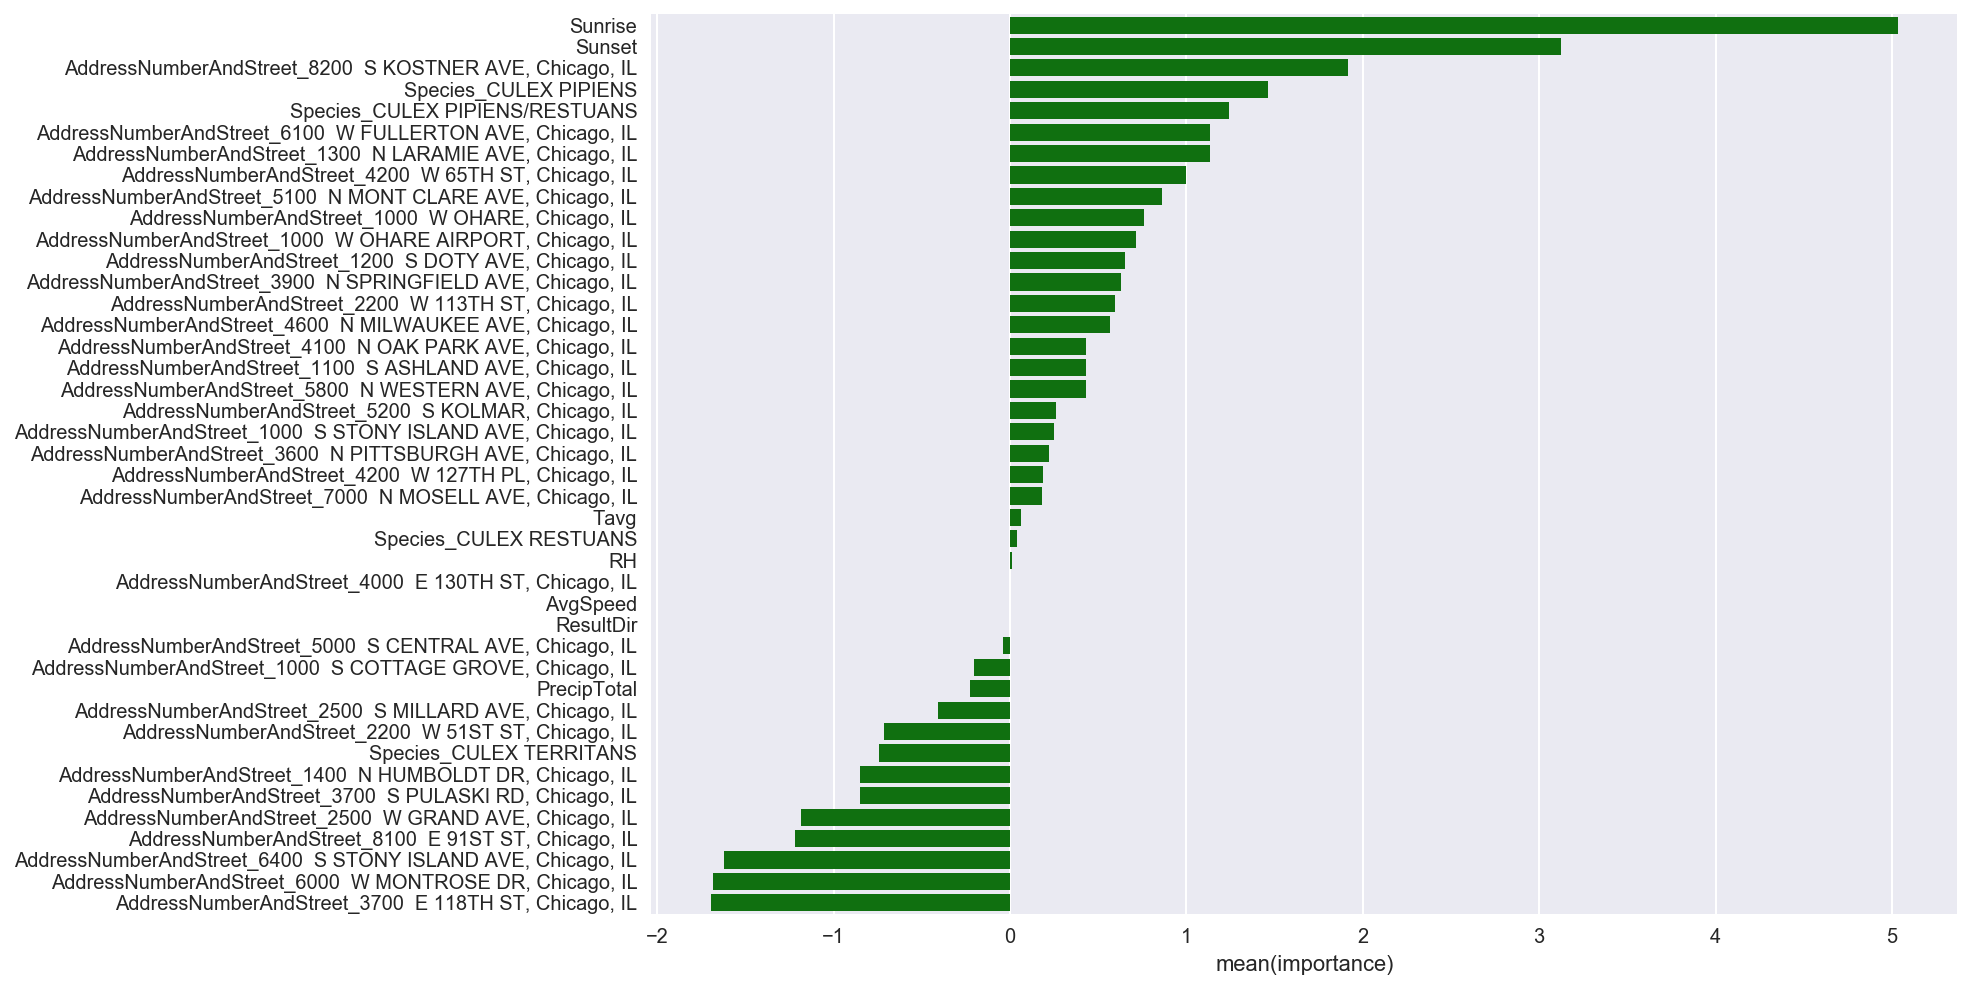

In [578]:
sns.set(font_scale=1)
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
ax = sns.barplot(y=important_words2.index, x=important_words2.importance, data=important_words2, color='g', orient='h', label='big')

In [ ]:
feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances', label='big')
plt.ylabel('Feature Importance Score')

In [241]:
# For a single-input model with 2 classes (binary classification):
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(153,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model, iterating on the data in batches of 32 samples
model.fit(X_train, y_train)

Epoch 1/10


KeyError: '[420 608 725 433 152 648 628 610 278 730 212 576  19 542 692 445 757 175\n 481  63 354 516 246 242  46 634 294 234 405  94  10 735] not in index'

In [597]:
dumb_test

Tavg   Sunrise     Sunset  PrecipTotal  ResultDir  AvgSpeed  \
0       75.0  4.266667  19.433333         0.00       18.0      10.2   
1       75.0  4.266667  19.433333         0.00       18.0      10.2   
2       75.0  4.266667  19.433333         0.00       18.0      10.2   
3       75.0  4.266667  19.433333         0.00       18.0      10.2   
4       75.0  4.266667  19.433333         0.00       18.0      10.2   
5       75.0  4.266667  19.433333         0.00       18.0      10.2   
6       75.0  4.266667  19.433333         0.00       18.0      10.2   
7       75.0  4.266667  19.433333         0.00       18.0      10.2   
8       75.0  4.266667  19.433333         0.00       18.0      10.2   
9       75.0  4.266667  19.433333         0.00       18.0      10.2   
10      75.0  4.266667  19.433333         0.00       18.0      10.2   
11      75.0  4.266667  19.433333         0.00       18.0      10.2   
12      75.0  4.266667  19.433333         0.00       18.0      10.2   
13      75.0  4.266667  19.433333         0.00       18.0      10.2   
14      75.0  4.266667  19.433333         0.00       18.0      10.2   
15      75.0  4.266667  19.433333         0.00       18.0      10.2   
16      75.0  4.266667  19.433333         0.00       18.0      10.2   
17      75.0  4.266667  19.433333         0.00       18.0      10.2   
18      75.0  4.266667  19.433333         0.00       18.0      10.2   
19      75.0  4.266667  19.433333         0.00       18.0      10.2   
20      75.0  4.266667  19.433333         0.00       18.0      10.2   
21      75.0  4.266667  19.433333         0.00       18.0      10.2   
22      75.0  4.266667  19.433333         0.00       18.0      10.2   
23      75.0  4.266667  19.433333         0.00       18.0      10.2   
24      75.0  4.266667  19.433333         0.00       18.0      10.2   
25      75.0  4.266667  19.433333         0.00       18.0      10.2   
26      75.0  4.266667  19.433333         0.00       18.0      10.2   
27      75.0  4.266667  19.433333         0.00       18.0      10.2   
28      75.0  4.266667  19.433333         0.00       18.0      10.2   
29      75.0  4.266667  19.433333         0.00       18.0      10.2   
...      ...       ...        ...          ...        ...       ...   
116263  69.5  5.816667  17.533333         0.52       17.0       7.9   
116264  69.5  5.816667  17.533333         0.52       17.0       7.9   
116265  69.5  5.816667  17.533333         0.52       17.0       7.9   
116266  69.5  5.816667  17.533333         0.52       17.0       7.9   
116267  69.5  5.816667  17.533333         0.52       17.0       7.9   
116268  69.5  5.816667  17.533333         0.52       17.0       7.9   
116269  69.5  5.816667  17.533333         0.52       17.0       7.9   
116270  69.5  5.816667  17.533333         0.52       17.0       7.9   
116271  69.5  5.816667  17.533333         0.52       17.0       7.9   
116272  69.5  5.816667  17.533333         0.52       17.0       7.9   
116273  69.5  5.816667  17.533333         0.52       17.0       7.9   
116274  69.5  5.816667  17.533333         0.52       17.0       7.9   
116275  69.5  5.816667  17.533333         0.52       17.0       7.9   
116276  69.5  5.816667  17.533333         0.52       17.0       7.9   
116277  69.5  5.816667  17.533333         0.52       17.0       7.9   
116278  69.5  5.816667  17.533333         0.52       17.0       7.9   
116279  69.5  5.816667  17.533333         0.52       17.0       7.9   
116280  69.5  5.816667  17.533333         0.52       17.0       7.9   
116281  69.5  5.816667  17.533333         0.52       17.0       7.9   
116282  69.5  5.816667  17.533333         0.52       17.0       7.9   
116283  69.5  5.816667  17.533333         0.52       17.0       7.9   
116284  69.5  5.816667  17.533333         0.52       17.0       7.9   
116285  69.5  5.816667  17.533333         0.52       17.0       7.9   
116286  69.5  5.816667  17.533333         0.52       17.0       7.9   
116287  69.5  5.816667  17.53333

In [ ]:
116293

In [600]:
# wnv_t = dumb_test[dumb_test['WnvPresent'] == 0]
# w1nv_t = dumb_test[dumb_test['WnvPresent'] == 1]

# CANNOT BALANCE the data becasue it has no WnvPresent

In [599]:
eda.eda(dumb_test)

missing values 
Tavg                                                                       0
Sunrise                                                                    0
Sunset                                                                     0
PrecipTotal                                                                0
ResultDir                                                                  0
AvgSpeed                                                                   0
RH                                                                         0
Species_CULEX ERRATICUS                                                    0
Species_CULEX PIPIENS                                                      0
Species_CULEX PIPIENS/RESTUANS                                             0
Species_CULEX RESTUANS                                                     0
Species_CULEX SALINARIUS                                                   0
Species_CULEX TARSALIS                                      

                Tavg        Sunrise         Sunset    PrecipTotal  \
count  116293.000000  116293.000000  116293.000000  116293.000000   
mean       72.106012       4.872003      18.912071       0.153525   
std         6.327837       0.475960       0.595392       0.409255   
min        54.000000       4.266667      17.533333       0.000000   
25%        67.500000       4.433333      18.483333       0.000000   
50%        72.500000       4.816667      19.116667       0.000000   
75%        77.500000       5.266667      19.433333       0.095000   
max        83.500000       5.816667      19.516667       2.970000   

           ResultDir       AvgSpeed             RH  Species_CULEX ERRATICUS  \
count  116293.000000  116293.000000  116293.000000            116293.000000   
mean       18.275197       8.020708      59.446267                 0.123352   
std         9.445465       2.510389      13.067962                 0.328842   
min         1.000000       2.800000      16.666667            

In [609]:


predictions = best_xgb.predict_proba(dumb_test)

sample = pd.DataFrame(predictions[1], columns=['WnvPresent'])

sample.to_csv('beat_the_benchmark.csv', index=False)

ValueError: feature_names mismatch: [u'AddressNumberAndStreet_1000  N CENTRAL PARK DR, Chicago, IL', u'AddressNumberAndStreet_1000  S CALIFORNIA AVE, Chicago, IL', u'AddressNumberAndStreet_1000  S COTTAGE GROVE, Chicago, IL', u'AddressNumberAndStreet_1000  S STONY ISLAND AVE, Chicago, IL', u'AddressNumberAndStreet_1000  S VINCENNES, Chicago, IL', u'AddressNumberAndStreet_1000  W 95TH ST, Chicago, IL', u'AddressNumberAndStreet_1000  W OHARE AIRPORT, Chicago, IL', u'AddressNumberAndStreet_1000  W OHARE, Chicago, IL', u'AddressNumberAndStreet_1100  S ARTESIAN AVE, Chicago, IL', u'AddressNumberAndStreet_1100  S ASHLAND AVE, Chicago, IL', u'AddressNumberAndStreet_1100  S AVENUE L, Chicago, IL', u'AddressNumberAndStreet_1100  S CALIFORNIA, Chicago, IL', u'AddressNumberAndStreet_1100  S PEORIA ST, Chicago, IL', u'AddressNumberAndStreet_1100  S STATE ST, Chicago, IL', u'AddressNumberAndStreet_1100  S WALLACE ST, Chicago, IL', u'AddressNumberAndStreet_1100  W CHICAGO, Chicago, IL', u'AddressNumberAndStreet_1100  W ROOSEVELT, Chicago, IL', u'AddressNumberAndStreet_1200  S DOTY AVE, Chicago, IL', u'AddressNumberAndStreet_1200  W GREENLEAF AVE, Chicago, IL', u'AddressNumberAndStreet_1300  N LARAMIE AVE, Chicago, IL', u'AddressNumberAndStreet_1300  S BRANDON, Chicago, IL', u'AddressNumberAndStreet_1300  S MACKINAW, Chicago, IL', u'AddressNumberAndStreet_1300  S TORRENCE AVE, Chicago, IL', u'AddressNumberAndStreet_1400  N HUMBOLDT DR, Chicago, IL', u'AddressNumberAndStreet_1500  N LONG AVE, Chicago, IL', u'AddressNumberAndStreet_1500  W GRANVILLE AVE, Chicago, IL', u'AddressNumberAndStreet_1500  W WEBSTER AVE, Chicago, IL', u'AddressNumberAndStreet_1700  N ASHLAND AVE, Chicago, IL', u'AddressNumberAndStreet_1700  N PULASKI RD, Chicago, IL', u'AddressNumberAndStreet_1700  W 95TH ST, Chicago, IL', u'AddressNumberAndStreet_1700  W ADDISON ST, Chicago, IL', u'AddressNumberAndStreet_1800  W FARWELL AVE, Chicago, IL', u'AddressNumberAndStreet_1800  W LELAND AVE, Chicago, IL', u'AddressNumberAndStreet_2000  E 111TH ST, Chicago, IL', u'AddressNumberAndStreet_2100  N CANNON DR, Chicago, IL', u'AddressNumberAndStreet_2100  N LAWLER AVE, Chicago, IL', u'AddressNumberAndStreet_2100  N STAVE ST, Chicago, IL', u'AddressNumberAndStreet_2100  S HAMLIN AVE, Chicago, IL', u'AddressNumberAndStreet_2200  N CANNON DR, Chicago, IL', u'AddressNumberAndStreet_2200  W 113TH ST, Chicago, IL', u'AddressNumberAndStreet_2200  W 51ST ST, Chicago, IL', u'AddressNumberAndStreet_2200  W 69TH ST, Chicago, IL', u'AddressNumberAndStreet_2200  W 89TH ST, Chicago, IL', u'AddressNumberAndStreet_2200  W PERSHING RD, Chicago, IL', u'AddressNumberAndStreet_2400  E 105TH ST, Chicago, IL', u'AddressNumberAndStreet_2500  S MILLARD AVE, Chicago, IL', u'AddressNumberAndStreet_2500  S THROOP, Chicago, IL', u'AddressNumberAndStreet_2500  W GRAND AVE, Chicago, IL', u'AddressNumberAndStreet_2700  S WESTERN AVE, Chicago, IL', u'AddressNumberAndStreet_2800  N FRANCISCO AVE, Chicago, IL', u'AddressNumberAndStreet_2900  W 85TH ST, Chicago, IL', u'AddressNumberAndStreet_3000  S HOYNE AVE, Chicago, IL', u'AddressNumberAndStreet_3000  W 18TH ST, Chicago, IL', u'AddressNumberAndStreet_3300  E RANDOLPH ST, Chicago, IL', u'AddressNumberAndStreet_3300  N RUTHERFORD AVE, Chicago, IL', u'AddressNumberAndStreet_3300  W 104TH ST, Chicago, IL', u'AddressNumberAndStreet_3400  W 77TH ST, Chicago, IL', u'AddressNumberAndStreet_3500  W 116TH ST, Chicago, IL', u'AddressNumberAndStreet_3500  W 51ST ST, Chicago, IL', u'AddressNumberAndStreet_3600  N PITTSBURGH AVE, Chicago, IL', u'AddressNumberAndStreet_3700  E 118TH ST, Chicago, IL', u'AddressNumberAndStreet_3700  N KEDVALE AVE, Chicago, IL', u'AddressNumberAndStreet_3700  S PULASKI RD, Chicago, IL', u'AddressNumberAndStreet_3800  E 115TH ST, Chicago, IL', u'AddressNumberAndStreet_3800  N CALIFORNIA AVE, Chicago, IL', u'AddressNumberAndStreet_3900  N SPRINGFIELD AVE, Chicago, IL', u'AddressNumberAndStreet_3900  S ASHLAND AVE, Chicago, IL', u'AddressNumberAndStreet_4000  E 130TH ST, Chicago, IL', u'AddressNumberAndStreet_4000  N AUSTIN AVE, Chicago, IL', u'AddressNumberAndStreet_4000  N TRIPP AVE, Chicago, IL', u'AddressNumberAndStreet_4000  S DEARBORN ST, Chicago, IL', u'AddressNumberAndStreet_4100  N OAK PARK AVE, Chicago, IL', u'AddressNumberAndStreet_4200  N RICHMOND ST, Chicago, IL', u'AddressNumberAndStreet_4200  W 127TH PL, Chicago, IL', u'AddressNumberAndStreet_4200  W 31ST ST, Chicago, IL', u'AddressNumberAndStreet_4200  W 65TH ST, Chicago, IL', u'AddressNumberAndStreet_4300  N ASHLAND AVE OVERPASS, Chicago, IL', u'AddressNumberAndStreet_4500  N CAMPBELL AVE, Chicago, IL', u'AddressNumberAndStreet_4600  N MILWAUKEE AVE, Chicago, IL', u'AddressNumberAndStreet_4700  S CORNELL AVE, Chicago, IL', u'AddressNumberAndStreet_4800  W MONTANA ST, Chicago, IL', u'AddressNumberAndStreet_4900  W BALMORAL AVE, Chicago, IL', u'AddressNumberAndStreet_4900  W SUNNYSIDE AVE, Chicago, IL', u'AddressNumberAndStreet_5000  S CENTRAL AVE, Chicago, IL', u'AddressNumberAndStreet_5000  S UNION AVE, Chicago, IL', u'AddressNumberAndStreet_5100  N MONT CLARE AVE, Chicago, IL', u'AddressNumberAndStreet_5100  W 72ND ST, Chicago, IL', u'AddressNumberAndStreet_5200  S KOLMAR, Chicago, IL', u'AddressNumberAndStreet_5200  S NORDICA, Chicago, IL', u'AddressNumberAndStreet_5200  W 63RD ST, Chicago, IL', u'AddressNumberAndStreet_5300  N STREETER DR, Chicago, IL', u'AddressNumberAndStreet_5300  W AGATITE AVE, Chicago, IL', u'AddressNumberAndStreet_5500  S DR MARTIN LUTHER KING JR DR, Chicago, IL', u'AddressNumberAndStreet_5800  N PULASKI RD, Chicago, IL', u'AddressNumberAndStreet_5800  N RIDGE AVE, Chicago, IL', u'AddressNumberAndStreet_5800  N WESTERN AVE, Chicago, IL', u'AddressNumberAndStreet_6000  N AVONDALE AVE, Chicago, IL', u'AddressNumberAndStreet_6000  W MONTROSE DR, Chicago, IL', u'AddressNumberAndStreet_6000  W ROSCOE ST, Chicago, IL', u'AddressNumberAndStreet_6100  N LEMONT AVE, Chicago, IL', u'AddressNumberAndStreet_6100  S MELVINA AVE, Chicago, IL', u'AddressNumberAndStreet_6100  W FULLERTON AVE, Chicago, IL', u'AddressNumberAndStreet_6200  N MANDELL AVE, Chicago, IL', u'AddressNumberAndStreet_6200  N MCCLELLAN AVE, Chicago, IL', u'AddressNumberAndStreet_6300  W 64TH ST, Chicago, IL', u'AddressNumberAndStreet_6400  S STONY ISLAND AVE, Chicago, IL', u'AddressNumberAndStreet_6400  W STRONG ST, Chicago, IL', u'AddressNumberAndStreet_6500  E 91ST PL, Chicago, IL', u'AddressNumberAndStreet_6500  N OAK PARK AVE, Chicago, IL', u'AddressNumberAndStreet_6500  S RACINE AVE, Chicago, IL', u'AddressNumberAndStreet_6600  S KILPATRICK AVE, Chicago, IL', u'AddressNumberAndStreet_6700  S KEDZIE AVE, Chicago, IL', u'AddressNumberAndStreet_6800  W BELDEN AVE, Chicago, IL', u'AddressNumberAndStreet_7000   W ARMITAGE AVENUE, Chicago, IL', u'AddressNumberAndStreet_7000  N MOSELL AVE, Chicago, IL', u'AddressNumberAndStreet_7100  N HARLEM AVE, Chicago, IL', u'AddressNumberAndStreet_7100  S SOUTH SHORE DR, Chicago, IL', u'AddressNumberAndStreet_7200  N OKETO AVE, Chicago, IL', u'AddressNumberAndStreet_7300  S CICERO AVE, Chicago, IL', u'AddressNumberAndStreet_7500  N OAKLEY AVE, Chicago, IL', u'AddressNumberAndStreet_7700  S EBERHART AVE, Chicago, IL', u'AddressNumberAndStreet_7900  S CHICAGO AVE, Chicago, IL', u'AddressNumberAndStreet_7900  W FOSTER AVE, Chicago, IL', u'AddressNumberAndStreet_8000  S KEDZIE AVE, Chicago, IL', u'AddressNumberAndStreet_8100  E 91ST ST, Chicago, IL', u'AddressNumberAndStreet_8100  W 37TH PL., Chicago, IL', u'AddressNumberAndStreet_8200  E 138TH ST, Chicago, IL', u'AddressNumberAndStreet_8200  S KOSTNER AVE, Chicago, IL', u'AddressNumberAndStreet_8900  S CARPENTER ST, Chicago, IL', u'AddressNumberAndStreet_8900  S MUSKEGON AVE, Chicago, IL', u'AddressNumberAndStreet_9000  W GARFIELD BLVD, Chicago, IL', u'AddressNumberAndStreet_9100  W HIGGINS AVE, Chicago, IL', u'AddressNumberAndStreet_9100  W HIGGINS RD, Chicago, IL', u'AddressNumberAndStreet_9300  S DR MARTIN LUTHER KING JR DR, Chicago, IL', u'AddressNumberAndStreet_9600  S HOYNE AVE, Chicago, IL', u'AddressNumberAndStreet_9600  S LONGWOOD DR, Chicago, IL', u'AddressNumberAndStreet_9800  S AVENUE G, Chicago, IL', u'Species_CULEX PIPIENS', u'Species_CULEX PIPIENS/RESTUANS', u'Species_CULEX RESTUANS', u'Species_CULEX SALINARIUS', u'Species_CULEX TARSALIS', u'Species_CULEX TERRITANS', u'Tavg', u'Sunrise', u'Sunset', u'PrecipTotal', u'ResultDir', u'AvgSpeed', u'RH'] [u'Tavg', u'Sunrise', u'Sunset', u'PrecipTotal', u'ResultDir', u'AvgSpeed', u'RH', u'Species_CULEX ERRATICUS', u'Species_CULEX PIPIENS', u'Species_CULEX PIPIENS/RESTUANS', u'Species_CULEX RESTUANS', u'Species_CULEX SALINARIUS', u'Species_CULEX TARSALIS', u'Species_CULEX TERRITANS', u'Species_UNSPECIFIED CULEX', u'AddressNumberAndStreet_1000  E 67TH ST, Chicago, IL', u'AddressNumberAndStreet_1000  N CENTRAL PARK DR, Chicago, IL', u'AddressNumberAndStreet_1000  S CALIFORNIA AVE, Chicago, IL', u'AddressNumberAndStreet_1000  S COTTAGE GROVE, Chicago, IL', u'AddressNumberAndStreet_1000  S OGLESBY AVE, Chicago, IL', u'AddressNumberAndStreet_1000  S STONY ISLAND AVE, Chicago, IL', u'AddressNumberAndStreet_1000  S VINCENNES, Chicago, IL', u'AddressNumberAndStreet_1000  W 95TH ST, Chicago, IL', u'AddressNumberAndStreet_1000  W OHARE AIRPORT, Chicago, IL', u'AddressNumberAndStreet_1000  W OHARE, Chicago, IL', u'AddressNumberAndStreet_1100  S ARTESIAN AVE, Chicago, IL', u'AddressNumberAndStreet_1100  S ASHLAND AVE, Chicago, IL', u'AddressNumberAndStreet_1100  S AVENUE L, Chicago, IL', u'AddressNumberAndStreet_1100  S CALIFORNIA, Chicago, IL', u'AddressNumberAndStreet_1100  S LOOMIS ST, Chicago, IL', u'AddressNumberAndStreet_1100  S PEORIA ST, Chicago, IL', u'AddressNumberAndStreet_1100  S STATE ST, Chicago, IL', u'AddressNumberAndStreet_1100  S WALLACE ST, Chicago, IL', u'AddressNumberAndStreet_1100  W CHICAGO, Chicago, IL', u'AddressNumberAndStreet_1100  W ROOSEVELT, Chicago, IL', u'AddressNumberAndStreet_1200  S BALTIMORE AVE, Chicago, IL', u'AddressNumberAndStreet_1200  S DOTY AVE, Chicago, IL', u'AddressNumberAndStreet_1200  W 120TH ST, Chicago, IL', u'AddressNumberAndStreet_1200  W GREENLEAF AVE, Chicago, IL', u'AddressNumberAndStreet_1300  N LARAMIE AVE, Chicago, IL', u'AddressNumberAndStreet_1300  S BRANDON, Chicago, IL', u'AddressNumberAndStreet_1300  S MACKINAW, Chicago, IL', u'AddressNumberAndStreet_1300  S TORRENCE AVE, Chicago, IL', u'AddressNumberAndStreet_1400  N HUMBOLDT DR, Chicago, IL', u'AddressNumberAndStreet_1400  W 112TH ST, Chicago, IL', u'AddressNumberAndStreet_1500  N LONG AVE, Chicago, IL', u'AddressNumberAndStreet_1500  W GRANVILLE AVE, Chicago, IL', u'AddressNumberAndStreet_1500  W WEBSTER AVE, Chicago, IL', u'AddressNumberAndStreet_1700  N ASHLAND AVE, Chicago, IL', u'AddressNumberAndStreet_1700  N PULASKI RD, Chicago, IL', u'AddressNumberAndStreet_1700  W 95TH ST, Chicago, IL', u'AddressNumberAndStreet_1700  W ADDISON ST, Chicago, IL', u'AddressNumberAndStreet_1800  W FARWELL AVE, Chicago, IL', u'AddressNumberAndStreet_1800  W LELAND AVE, Chicago, IL', u'AddressNumberAndStreet_2000  E 111TH ST, Chicago, IL', u'AddressNumberAndStreet_2100  N CANNON DR, Chicago, IL', u'AddressNumberAndStreet_2100  N LAWLER AVE, Chicago, IL', u'AddressNumberAndStreet_2100  N STAVE ST, Chicago, IL', u'AddressNumberAndStreet_2100  S HAMLIN AVE, Chicago, IL', u'AddressNumberAndStreet_2200  N CANNON DR, Chicago, IL', u'AddressNumberAndStreet_2200  W 113TH ST, Chicago, IL', u'AddressNumberAndStreet_2200  W 51ST ST, Chicago, IL', u'AddressNumberAndStreet_2200  W 69TH ST, Chicago, IL', u'AddressNumberAndStreet_2200  W 89TH ST, Chicago, IL', u'AddressNumberAndStreet_2200  W PERSHING RD, Chicago, IL', u'AddressNumberAndStreet_2400  E 105TH ST, Chicago, IL', u'AddressNumberAndStreet_2500  S MILLARD AVE, Chicago, IL', u'AddressNumberAndStreet_2500  S THROOP, Chicago, IL', u'AddressNumberAndStreet_2500  W GRAND AVE, Chicago, IL', u'AddressNumberAndStreet_2600  E 136TH ST, Chicago, IL', u'AddressNumberAndStreet_2700  S WESTERN AVE, Chicago, IL', u'AddressNumberAndStreet_2800  N FRANCISCO AVE, Chicago, IL', u'AddressNumberAndStreet_2900  N KENNETH AVE, Chicago, IL', u'AddressNumberAndStreet_2900  W 85TH ST, Chicago, IL', u'AddressNumberAndStreet_3000  S HOYNE AVE, Chicago, IL', u'AddressNumberAndStreet_3000  W 18TH ST, Chicago, IL', u'AddressNumberAndStreet_3300  E RANDOLPH ST, Chicago, IL', u'AddressNumberAndStreet_3300  N RUTHERFORD AVE, Chicago, IL', u'AddressNumberAndStreet_3300  W 104TH ST, Chicago, IL', u'AddressNumberAndStreet_3400  N LONG AVE, Chicago, IL', u'AddressNumberAndStreet_3400  W 77TH ST, Chicago, IL', u'AddressNumberAndStreet_3500  W 116TH ST, Chicago, IL', u'AddressNumberAndStreet_3500  W 51ST ST, Chicago, IL', u'AddressNumberAndStreet_3600  N PITTSBURGH AVE, Chicago, IL', u'AddressNumberAndStreet_3700  E 118TH ST, Chicago, IL', u'AddressNumberAndStreet_3700  N KEDVALE AVE, Chicago, IL', u'AddressNumberAndStreet_3700  N KILBOURN AVE, Chicago, IL', u'AddressNumberAndStreet_3700  S PULASKI RD, Chicago, IL', u'AddressNumberAndStreet_3800  E 115TH ST, Chicago, IL', u'AddressNumberAndStreet_3800  N CALIFORNIA AVE, Chicago, IL', u'AddressNumberAndStreet_3900  N SPRINGFIELD AVE, Chicago, IL', u'AddressNumberAndStreet_3900  S ASHLAND AVE, Chicago, IL', u'AddressNumberAndStreet_4000  E 130TH ST, Chicago, IL', u'AddressNumberAndStreet_4000  N AUSTIN AVE, Chicago, IL', u'AddressNumberAndStreet_4000  N KEDVALE AVE, Chicago, IL', u'AddressNumberAndStreet_4000  N TRIPP AVE, Chicago, IL', u'AddressNumberAndStreet_4000  S DEARBORN ST, Chicago, IL', u'AddressNumberAndStreet_4100  N OAK PARK AVE, Chicago, IL', u'AddressNumberAndStreet_4200  N RICHMOND ST, Chicago, IL', u'AddressNumberAndStreet_4200  W 127TH PL, Chicago, IL', u'AddressNumberAndStreet_4200  W 31ST ST, Chicago, IL', u'AddressNumberAndStreet_4200  W 65TH ST, Chicago, IL', u'AddressNumberAndStreet_4300  N ASHLAND AVE OVERPASS, Chicago, IL', u'AddressNumberAndStreet_4500  N CAMPBELL AVE, Chicago, IL', u'AddressNumberAndStreet_4600  N MELVINA AVE, Chicago, IL', u'AddressNumberAndStreet_4600  N MILWAUKEE AVE, Chicago, IL', u'AddressNumberAndStreet_4700  S CORNELL AVE, Chicago, IL', u'AddressNumberAndStreet_4800  W MONTANA ST, Chicago, IL', u'AddressNumberAndStreet_4900  W BALMORAL AVE, Chicago, IL', u'AddressNumberAndStreet_4900  W SUNNYSIDE AVE, Chicago, IL', u'AddressNumberAndStreet_5000  S CENTRAL AVE, Chicago, IL', u'AddressNumberAndStreet_5000  S UNION AVE, Chicago, IL', u'AddressNumberAndStreet_5100  N MONT CLARE AVE, Chicago, IL', u'AddressNumberAndStreet_5100  W 63RD PL, Chicago, IL', u'AddressNumberAndStreet_5100  W 72ND ST, Chicago, IL', u'AddressNumberAndStreet_5200  S KOLMAR, Chicago, IL', u'AddressNumberAndStreet_5200  S NORDICA, Chicago, IL', u'AddressNumberAndStreet_5200  W 63RD ST, Chicago, IL', u'AddressNumberAndStreet_5300  N STREETER DR, Chicago, IL', u'AddressNumberAndStreet_5300  W AGATITE AVE, Chicago, IL', u'AddressNumberAndStreet_5500  S DR MARTIN LUTHER KING JR DR, Chicago, IL', u'AddressNumberAndStreet_5800  N PULASKI RD, Chicago, IL', u'AddressNumberAndStreet_5800  N RIDGE AVE, Chicago, IL', u'AddressNumberAndStreet_5800  N WESTERN AVE, Chicago, IL', u'AddressNumberAndStreet_6000  N AVONDALE AVE, Chicago, IL', u'AddressNumberAndStreet_6000  W MONTROSE DR, Chicago, IL', u'AddressNumberAndStreet_6000  W ROSCOE ST, Chicago, IL', u'AddressNumberAndStreet_6100  N LEMONT AVE, Chicago, IL', u'AddressNumberAndStreet_6100  S MELVINA AVE, Chicago, IL', u'AddressNumberAndStreet_6100  W FULLERTON AVE, Chicago, IL', u'AddressNumberAndStreet_6200  N MANDELL AVE, Chicago, IL', u'AddressNumberAndStreet_6200  N MCCLELLAN AVE, Chicago, IL', u'AddressNumberAndStreet_6300  W 64TH ST, Chicago, IL', u'AddressNumberAndStreet_6400  S STONY ISLAND AVE, Chicago, IL', u'AddressNumberAndStreet_6400  W STRONG ST, Chicago, IL', u'AddressNumberAndStreet_6500  E 91ST PL, Chicago, IL', u'AddressNumberAndStreet_6500  N OAK PARK AVE, Chicago, IL', u'AddressNumberAndStreet_6500  S RACINE AVE, Chicago, IL', u'AddressNumberAndStreet_6500  W DAKIN ST, Chicago, IL', u'AddressNumberAndStreet_6600  S KILPATRICK AVE, Chicago, IL', u'AddressNumberAndStreet_6700  S KEDZIE AVE, Chicago, IL', u'AddressNumberAndStreet_6800  W BELDEN AVE, Chicago, IL', u'AddressNumberAndStreet_7000   W ARMITAGE AVENUE, Chicago, IL', u'AddressNumberAndStreet_7000  N MOSELL AVE, Chicago, IL', u'AddressNumberAndStreet_7100  N HARLEM AVE, Chicago, IL', u'AddressNumberAndStreet_7100  S SOUTH SHORE DR, Chicago, IL', u'AddressNumberAndStreet_7200  N OKETO AVE, Chicago, IL', u'AddressNumberAndStreet_7300  S CICERO AVE, Chicago, IL', u'AddressNumberAndStreet_7500  N OAKLEY AVE, Chicago, IL', u'AddressNumberAndStreet_7700  S EBERHART AVE, Chicago, IL', u'AddressNumberAndStreet_7900  S CHICAGO AVE, Chicago, IL', u'AddressNumberAndStreet_7900  W FOSTER AVE, Chicago, IL', u'AddressNumberAndStreet_8000  S KEDZIE AVE, Chicago, IL', u'AddressNumberAndStreet_8100  E 91ST ST, Chicago, IL', u'AddressNumberAndStreet_8100  W 37TH PL., Chicago, IL', u'AddressNumberAndStreet_8200  E 138TH ST, Chicago, IL', u'AddressNumberAndStreet_8200  S KOSTNER AVE, Chicago, IL', u'AddressNumberAndStreet_8900  S CARPENTER ST, Chicago, IL', u'AddressNumberAndStreet_8900  S MUSKEGON AVE, Chicago, IL', u'AddressNumberAndStreet_9000  W GARFIELD BLVD, Chicago, IL', u'AddressNumberAndStreet_9100  W HIGGINS AVE, Chicago, IL', u'AddressNumberAndStreet_9100  W HIGGINS RD, Chicago, IL', u'AddressNumberAndStreet_9300  S DR MARTIN LUTHER KING JR DR, Chicago, IL', u'AddressNumberAndStreet_9600  S HOYNE AVE, Chicago, IL', u'AddressNumberAndStreet_9600  S LONGWOOD DR, Chicago, IL', u'AddressNumberAndStreet_9800  S AVENUE G, Chicago, IL']
training data did not have the following fields: AddressNumberAndStreet_1200  W 120TH ST, Chicago, IL, AddressNumberAndStreet_1100  S LOOMIS ST, Chicago, IL, AddressNumberAndStreet_1400  W 112TH ST, Chicago, IL, AddressNumberAndStreet_6500  W DAKIN ST, Chicago, IL, Species_CULEX ERRATICUS, AddressNumberAndStreet_1000  E 67TH ST, Chicago, IL, AddressNumberAndStreet_2600  E 136TH ST, Chicago, IL, Species_UNSPECIFIED CULEX, AddressNumberAndStreet_2900  N KENNETH AVE, Chicago, IL, AddressNumberAndStreet_4000  N KEDVALE AVE, Chicago, IL, AddressNumberAndStreet_5100  W 63RD PL, Chicago, IL, AddressNumberAndStreet_1200  S BALTIMORE AVE, Chicago, IL, AddressNumberAndStreet_3400  N LONG AVE, Chicago, IL, AddressNumberAndStreet_3700  N KILBOURN AVE, Chicago, IL, AddressNumberAndStreet_4600  N MELVINA AVE, Chicago, IL, AddressNumberAndStreet_1000  S OGLESBY AVE, Chicago, IL

In [602]:
X

Sunrise  AvgSpeed  Tavg  ResultDir  Species_CULEX PIPIENS/RESTUANS  \
603   4.666667      8.00  77.0       19.5                               0   
4011  4.850000      7.50  70.0       15.0                               1   
249   4.333333      8.30  67.0       13.0                               0   
5807  5.050000      5.50  76.5       13.5                               0   
264   4.333333      8.30  67.0       13.0                               1   
564   4.633333      6.80  77.5       24.0                               1   
5162  4.483333      6.75  79.0        9.5                               0   
4641  5.800000      9.10  51.0       13.0                               1   
5828  5.050000      5.50  76.5       13.5                               0   
959   4.766667      6.55  81.5       24.5                               0   
2733  5.866667      5.25  68.5       17.0                               0   
8330  5.600000     10.30  77.0       16.0                               0   
2455  5.683333     11.20  80.0       19.0                               1   
8410  5.716667      4.40  64.0        8.5                               1   
1305  4.983333      6.45  76.5        6.5                               1   
994   4.766667      6.55  81.5       24.5                               0   
4381  5.500000      2.40  71.5       23.0                               1   
5488  4.700000      5.75  79.5        4.0                               0   
8119  5.366667      6.00  73.0       18.5                               1   
1762  5.150000      7.20  75.0       25.0                               1   
8436  5.716667      4.40  64.0        8.5                               0   
2287  5.583333     12.95  77.0       19.0                               1   
6928  4.400000      9.45  78.5       22.5                               0   
82    4.283333      7.85  56.5        4.0                               0   
2888  4.316667      8.60  55.0        3.0                               1   
754   4.750000      3.90  80.5       11.0                               0   
3428  4.416667      4.75  74.5       21.0                               0   
7229  4.633333      4.50  69.5       23.0                               0   
116   4.300000      7.60  81.5       21.5                               0   
2896  4.316667      8.60  55.0        3.0                               1   
...        ...       ...   ...        ...                             ...   
8184  5.466667      9.60  72.5       34.5                               1   
8191  5.466667      9.60  72.5       34.5                               0   
8194  5.466667      9.60  72.5       34.5                               0   
8201  5.466667      9.60  72.5       34.5                               1   
8212  5.466667      9.60  72.5       34.5                               0   
8220  5.466667      9.60  72.5       34.5                               0   
8227  5.466667      9.60  72.5       34.5                               0   
8229  5.466667      9.60  72.5       34.5                               0   
8231  5.466667      9.60  72.5       34.5                               1   
8239  5.466667      9.60  72.5       34.5                               1   
8243  5.466667      9.60  72.5       34.5                               1   
8247  5.466667      9.60  72.5       34.5                               0   
8248  5.466667      9.60  72.5       34.5                               1   
8252  5.466667      9.60  72.5       34.5                               0   
8260  5.466667      9.60  72.5       34.5                               1   
8266  5.466667      9.60  72.5       34.5                               1   
8275  5.466667      9.60  72.5       34.5                               0   
8285  5.600000     10.30  77.0       16.0                               0   
8291  5.600000     10.30  77.0       16.0                               1   
8293  5.600000     10.30  77.0       16.0                               1   
829

59.0